In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_parquet('data.parquet')
data

,client_identifier,has_movie_streaming,has_device_protection,subscription_duration_in_months,gender,has_dependents,has_internet_service,has_online_backup,has_phone_service,multiple_phone_lines,...,payment_method,has_paperless_billing,has_web_security,agreement_type,relationship_status,senior_status,monthly_cost,has_tech_help,cumulative_cost,churn
0,SSWAG:1101,No,No,15,Female,No,DSL,No,Yes,Yes,...,Electronic check,Yes,No,Month-to-month,Yes,0,51.10,No,711.15,No
1,QNXIQ:6859,Yes,Yes,72,Female,Yes,Fiber optic,Yes,Yes,Yes,...,Bank transfer (automatic),Yes,Yes,Two year,Yes,0,113.10,Yes,8248.5,No
2,SVLTV:2931,Yes,No,40,Male,Yes,Fiber optic,Yes,Yes,Yes,...,Credit card (automatic),Yes,Yes,Month-to-month,Yes,0,110.10,Yes,4469.1,No
3,CHOPY:5110,Yes,Yes,60,Female,No,DSL,No,No,No phone service,...,Electronic check,No,Yes,Two year,No,0,53.60,No,3237.05,No
4,IEAXF:3704,Yes,No,72,Female,Yes,DSL,Yes,No,No phone service,...,Credit card (automatic),No,No,Two year,Yes,0,53.65,Yes,3784,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,WJZUE:4695,Yes,Yes,2,Female,No,Fiber optic,No,Yes,Yes,...,Electronic check,Yes,No,Month-to-month,No,1,88.55,No,179.25,Yes
6296,XLSGQ:3617,Yes,Yes,66,Female,Yes,Fiber optic,Yes,Yes,Yes,...,Bank transfer (automatic),No,Yes,Two year,Yes,0,109.25,No,7082.5,No
6297,UGBTK:9359,Yes,Yes,67,Female,No,DSL,No,Yes,No,...,Bank transfer (automatic),Yes,Yes,One year,No,0,72.35,Yes,4991.5,No
6298,BZVLZ:9928,Yes,Yes,12,Female,No,DSL,No,No,No phone service,...,Mailed check,No,Yes,Two year,No,0,49.85,Yes,552.1,No


In [3]:
def to_num(filled_data):
    #==================================================================================
    has_movie_streaming = filled_data['has_movie_streaming'].value_counts()
    condition_0 = [filled_data['has_movie_streaming'] == has_movie_streaming.index[0],
                   filled_data['has_movie_streaming'] == has_movie_streaming.index[1]]
    choice_0 = [0,
                1]  
    filled_data['has_movie_streaming'] = np.select(condition_0, choice_0, default = 2)
    #==================================================================================
    has_device_protection = filled_data['has_device_protection'].value_counts()
    condition_1 = [filled_data['has_device_protection'] == has_device_protection.index[0],
                   filled_data['has_device_protection'] == has_device_protection.index[1]]
    choice_1 = [0,
                1]  
    filled_data['has_device_protection'] = np.select(condition_1, choice_1, default = 2)
    #==================================================================================
    gender = filled_data['gender'].value_counts()
    condition_2 = [filled_data['gender'] == gender.index[0]]
    choice_2 = [0]  
    filled_data['gender'] = np.select(condition_2, choice_2, default = 1)
    #==================================================================================
    has_dependents = filled_data['has_dependents'].value_counts()
    condition_3 = [filled_data['has_dependents'] == has_dependents.index[0]]
    choice_3 = [0]  
    filled_data['has_dependents'] = np.select(condition_3, choice_3, default = 1)
    #==================================================================================
    has_internet_service = filled_data['has_internet_service'].value_counts()
    condition_4 = [filled_data['has_internet_service'] == has_internet_service.index[0],
                   filled_data['has_internet_service'] == has_internet_service.index[1]]
    choice_4 = [0,
                1]  
    filled_data['has_internet_service'] = np.select(condition_4, choice_4, default = 2)
    #==================================================================================
    has_online_backup = filled_data['has_online_backup'].value_counts()
    condition_5 = [filled_data['has_online_backup'] == has_online_backup.index[0],
                   filled_data['has_online_backup'] == has_online_backup.index[1]]
    choice_5 = [0,
                1]  
    filled_data['has_online_backup'] = np.select(condition_5, choice_5, default = 2)
    #==================================================================================
    has_phone_service = filled_data['has_phone_service'].value_counts()
    condition_6 = [filled_data['has_phone_service'] == has_phone_service.index[0]]
    choice_6 = [0]  
    filled_data['has_phone_service'] = np.select(condition_6, choice_6, default = 1)
    #==================================================================================
    multiple_phone_lines = filled_data['multiple_phone_lines'].value_counts()
    condition_7 = [filled_data['multiple_phone_lines'] == multiple_phone_lines.index[0],
                   filled_data['multiple_phone_lines'] == multiple_phone_lines.index[1]]
    choice_7 = [0,
                1]  
    filled_data['multiple_phone_lines'] = np.select(condition_7, choice_7, default = 2)
    #==================================================================================
    has_tv_streaming = filled_data['has_tv_streaming'].value_counts()
    condition_8 = [filled_data['has_tv_streaming'] == has_tv_streaming.index[0],
                   filled_data['has_tv_streaming'] == has_tv_streaming.index[1]]
    choice_8 = [0,
                1]  
    filled_data['has_tv_streaming'] = np.select(condition_8, choice_8, default = 2)
    #==================================================================================
    payment_method = filled_data['payment_method'].value_counts()
    condition_9 = [filled_data['payment_method'] == payment_method.index[0],
                   filled_data['payment_method'] == payment_method.index[1], 
                   filled_data['payment_method'] == payment_method.index[2]]
    choice_9 = [0,
                1,
                2]  
    filled_data['payment_method'] = np.select(condition_9, choice_9, default = 3)
    #==================================================================================
    has_paperless_billing = filled_data['has_paperless_billing'].value_counts()
    condition_10 = [filled_data['has_paperless_billing'] == has_paperless_billing.index[0]]
    choice_10 = [0]  
    filled_data['has_paperless_billing'] = np.select(condition_10, choice_10, default = 1)
    #==================================================================================
    has_web_security = filled_data['has_web_security'].value_counts()
    condition_11 = [filled_data['has_web_security'] == has_web_security.index[0],
                   filled_data['has_web_security'] == has_web_security.index[1]]
    choice_11 = [0,
                1]  
    filled_data['has_web_security'] = np.select(condition_11, choice_11, default = 2)
    #==================================================================================
    agreement_type = filled_data['agreement_type'].value_counts()
    condition_12 = [filled_data['agreement_type'] == agreement_type.index[0],
                   filled_data['agreement_type'] == agreement_type.index[1]]
    choice_12 = [0,
                1]  
    filled_data['agreement_type'] = np.select(condition_12, choice_12, default = 2)
    #==================================================================================
    relationship_status = filled_data['relationship_status'].value_counts()
    condition_13 = [filled_data['relationship_status'] == relationship_status.index[0]]
    choice_13 = [0]  
    filled_data['relationship_status'] = np.select(condition_13, choice_13, default = 1)
    #==================================================================================
    has_tech_help = filled_data['has_tech_help'].value_counts()
    condition_14 = [filled_data['has_tech_help'] == has_tech_help.index[0],
                   filled_data['has_tech_help'] == has_tech_help.index[1]]
    choice_14 = [0,
                1]  
    filled_data['has_tech_help'] = np.select(condition_14, choice_14, default = 2)
    #==================================================================================
    churn = filled_data['churn'].value_counts()
    condition_15 = [filled_data['churn'] == churn.index[0]]
    choice_15 = [0]  
    filled_data['churn'] = np.select(condition_15, choice_15, default = 1)
    filled_data = filled_data.drop(['client_identifier'], axis = 1)
    #==================================================================================
    filled_data['cumulative_cost'] = filled_data['cumulative_cost'].replace(' ', np.nan)
    filled_data['cumulative_cost'] = filled_data['cumulative_cost'].astype(float)
    return filled_data

In [4]:
def split_data(data):
    train_size = 0.8
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size)
    return pd.DataFrame(X_train), pd.DataFrame(X_test), pd.DataFrame(y_train), pd.DataFrame(y_test)

In [5]:
def logistic_regression(X_train, X_test, y_train, y_test, class_weight=None):
    # Ensure y_train and y_test are 1D arrays
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    # Train Logistic Regression Model
    regression = LogisticRegression(max_iter=7000, class_weight=class_weight)
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_test) 

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = metrics.classification_report(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    # Print Scores
    print(report)
    return y_pred

In [6]:
def boxplot(data, column, show= 'No'):
    data_boxplot = data[column]

    fig, ax = plt.subplots(figsize=(15, 10))
    
    boxplot = ax.boxplot(data_boxplot, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    whiskers = boxplot['whiskers']

    whisker_ends = [(whiskers[i].get_ydata()[1]) for i in range(0, len(whiskers))]
    border = []
    for y_end in whisker_ends:
        border.append(y_end)
        ax.axhline(y_end, color='black', linestyle='--', linewidth=1)
        print(f'Outlier Border: {y_end}')
    for median in boxplot['medians']:
        median.set(color='red')
    for flier in boxplot['fliers']:
        flier.set(markerfacecolor='green', marker='o', markersize=5)
        
    if show == "Yes":
        plt.show()
    else:
        plt.close()
    return border

In [7]:
def handle_test(X_train, X_test, y_train, y_test, feature_engineer='No'):
    X_test = pd.DataFrame(X_test)
    y_test = pd.DataFrame(y_test)
    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)

    # Set column names based on feature_engineer flag
    if feature_engineer == 'Yes':
        X_train.columns = ['has_movie_streaming', 'has_device_protection', 'subscription_duration_in_months', 'gender',
                           'has_dependents', 'has_internet_service', 'has_online_backup', 'has_phone_service',
                           'multiple_phone_lines', 'has_tv_streaming', 'payment_method', 'has_paperless_billing',
                           'has_web_security', 'agreement_type', 'relationship_status', 'senior_status', 'monthly_cost',
                           'has_tech_help', 'cumulative_cost', 'internet_with_backup', 'internet_and_tv_streaming',
                           'total_services', 'avg_monthly_cost_per_service']
        y_train.columns = ['churn']
        X_test.columns = ['has_movie_streaming', 'has_device_protection', 'subscription_duration_in_months', 'gender',
                          'has_dependents', 'has_internet_service', 'has_online_backup', 'has_phone_service',
                          'multiple_phone_lines', 'has_tv_streaming', 'payment_method', 'has_paperless_billing',
                          'has_web_security', 'agreement_type', 'relationship_status', 'senior_status', 'monthly_cost',
                          'has_tech_help', 'cumulative_cost']
        y_test.columns = ['churn']
    else:
        X_train.columns = data.columns[1:-1]
        y_train.columns = [data.columns[-1]]
        X_test.columns = data.columns[1:-1]
        y_test.columns = [data.columns[-1]]

    # Replace NaN values in 'cumulative_cost' where 'subscription_duration_in_months' is 0
    X_test.loc[(X_test['cumulative_cost'].isna()) & (X_test['subscription_duration_in_months'] == 0), 'cumulative_cost'] = 0

    epsilon = 1e-3
    X_test['subscription_duration_in_months'] = np.log((X_test['subscription_duration_in_months'] + epsilon) / (1 - X_test['subscription_duration_in_months'] + epsilon))
    X_test['monthly_cost'] = np.log((X_test['monthly_cost'] + epsilon) / (1 - X_test['monthly_cost'] + epsilon))
    X_test['cumulative_cost'] = np.log((X_test['cumulative_cost'] + epsilon) / (1 - X_test['cumulative_cost'] + epsilon))

    # Clip outliers using boxplot thresholds
    for column in ['monthly_cost', 'subscription_duration_in_months', 'cumulative_cost']:
        lower, upper = boxplot(X_train, column)
        X_test[column] = np.clip(X_test[column], lower, upper)

    # Add engineered features if feature_engineer is 'Yes'
    if feature_engineer == 'Yes':
        X_test['internet_with_backup'] = X_test['has_internet_service'] * X_test['has_online_backup']
        X_test['internet_and_tv_streaming'] = X_test['has_tv_streaming'] * X_test['has_internet_service']
        X_test['total_services'] = X_test[['has_movie_streaming', 'has_device_protection', 'has_online_backup', 'has_web_security', 'has_tech_help']].sum(axis=1)
        X_test['avg_monthly_cost_per_service'] = np.where(X_test['total_services'] != 0, 
                                                          X_test['monthly_cost'] / X_test['total_services'], 
                                                          0)
        X_test['avg_monthly_cost_per_service'] = X_test['avg_monthly_cost_per_service'].replace([np.inf, -np.inf], 0)
         

    # Drop 'agreement_type' column
    X_test.drop(columns=['agreement_type'], inplace=True)
    X_train.drop(columns=['agreement_type'], inplace=True)


    # Calculate class weights for logistic regression
    dt = y_test['churn'].value_counts()
    ratio = dt[0] / dt[1]
    weights = {0: ratio - 0.5, 1: 1}

    imputer = SimpleImputer(strategy='mean')
    X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test))
    X_test_imputed.columns = X_test.columns
    X_test_imputed.index = X_test.index

    return logistic_regression(X_train.values, X_test_imputed.values, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1), class_weight=weights)

## Base-line model - The data is modified so minimally that it was possible to make a prediction.

In [8]:
numeric_data = to_num(data)
numeric_data.shape

(6300, 20)

In [9]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   has_movie_streaming              6300 non-null   int32  
 1   has_device_protection            6300 non-null   int32  
 2   subscription_duration_in_months  6300 non-null   int64  
 3   gender                           6300 non-null   int32  
 4   has_dependents                   6300 non-null   int32  
 5   has_internet_service             6300 non-null   int32  
 6   has_online_backup                6300 non-null   int32  
 7   has_phone_service                6300 non-null   int32  
 8   multiple_phone_lines             6300 non-null   int32  
 9   has_tv_streaming                 6300 non-null   int32  
 10  payment_method                   6300 non-null   int32  
 11  has_paperless_billing            6300 non-null   int32  
 12  has_web_security    

##### It is noticeable that column "cumulative_cost" contains ten "NaN" values and i drop them because base-line model requires at least not to be "NaN" values in features. Also only ten values out of 6300 are missing, so dropping these values will neither affect the dataset much nor introduce any bias.

In [10]:
numeric_data['cumulative_cost'] = numeric_data['cumulative_cost'].astype(float)

In [11]:
base_data = numeric_data.dropna(subset=['cumulative_cost'])

In [12]:
X_train_base, X_test_base, y_train_base, y_test_base = split_data(base_data)

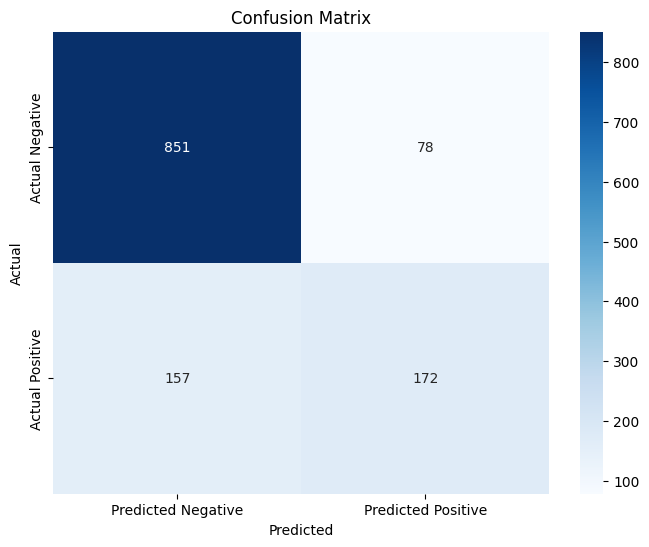

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       929
           1       0.69      0.52      0.59       329

    accuracy                           0.81      1258
   macro avg       0.77      0.72      0.74      1258
weighted avg       0.80      0.81      0.80      1258



array([0, 0, 0, ..., 0, 0, 0])

In [13]:
logistic_regression(X_train_base.values, X_test_base.values, y_train_base.values, y_test_base.values)

## Base-line-model prediction estimation.

##### The model demonstrates higher precision, recall, and F1-score for class "0" compared to class "1". This indicates that the model performs better at identifying instances of class "0" (negative class) than class "1" (positive class).
##### While precision for class "1" is moderate at 0.64, recall is relatively lower at 0.55, indicating that the model may miss a significant portion of actual "1" instances.
##### The F1-score for class "1" is notably lower compared to class "0", suggesting that the model's performance for class "1" might be less balanced in terms of precision and recall.
##### Because that we have imbalance significantly in target value accuracy which is 0.81 is no longer valid.

In [14]:
target_count = base_data['churn'].value_counts()
percentage_of_zero = target_count.values[0]/(target_count.values[0] + target_count.values[1])
percentage_of_one = 1 - percentage_of_zero
print(f'Percentage of zero in targer: {percentage_of_zero}')
print(f'Percentage of one: {percentage_of_one}')

Percentage of zero in targer: 0.7359300476947536
Percentage of one: 0.26406995230524644


##### As it turned out amount of zeros are significantly higher than amount of ones.

## Graphs' Functions

In [15]:
def hist(column, bell):
    mean = np.mean(column)
    std = np.std(column)

    figure, ax = plt.subplots(figsize=(10, 8))
    x = np.linspace(-10, 10, 1000) 
    
    ax.hist(column, bins=20, density=True, color='skyblue', alpha=0.7)
    if bell == 'Yes':
        ax.plot(x, norm.pdf(x, mean, std), 'r-', label='Bell-shaped curve (Normal distribution)')
    
    ax.set_ylabel('Probability Density')
    plt.tight_layout()
    plt.show()

In [16]:
def bar(data):
    categories = data.index
    values = data.values
    colors = sns.color_palette('viridis')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(categories, values, color=colors)
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height.round(2)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Model Building

###### First task is to do something with "NaN" values which is in column "cumulative_cost". As it turnes out "cumulative_cost" is dependent on "monthly_cost" and "subscription_duration_in_month". In below calculations it is shown that differences between actual "cumulative_cost" and "monthly_cost" multiplied by "subscription_duration_in_month" are very small.
###### There are "NaN" values exactly in rows where "subscription_duration_in_month" is zero. Also "agreement_type" in those 10 rows are two years mostly. I can deduce that they have built the agreement but after they quitted. So it is reasonable to replace "NaN" values by "0".

In [17]:
model_data = to_num(data)

In [18]:
model_data[model_data['subscription_duration_in_months'] == 0]

,has_movie_streaming,has_device_protection,subscription_duration_in_months,gender,has_dependents,has_internet_service,has_online_backup,has_phone_service,multiple_phone_lines,has_tv_streaming,payment_method,has_paperless_billing,has_web_security,agreement_type,relationship_status,senior_status,monthly_cost,has_tech_help,cumulative_cost,churn
213,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.35,2,NaN,0
2544,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.75,2,NaN,0
2883,2,2,0,0,1,2,2,0,0,2,1,0,2,2,1,0,19.70,2,NaN,0
2942,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,73.35,1,NaN,0
4478,2,2,0,0,1,2,2,0,0,2,1,1,2,1,0,0,20.25,2,NaN,0
4677,2,2,0,0,1,2,2,0,0,2,1,1,2,1,1,0,19.85,2,NaN,0
4786,0,1,0,1,1,1,0,1,2,1,2,0,1,1,1,0,52.55,1,NaN,0
4855,2,2,0,1,1,2,2,0,0,2,1,1,2,1,1,0,20.00,2,NaN,0
5477,0,1,0,1,1,1,1,1,2,1,3,1,1,1,1,0,56.05,1,NaN,0
6101,0,0,0,0,1,1,1,0,1,0,2,0,1,1,0,0,61.90,1,NaN,0


In [19]:
model_data[model_data['cumulative_cost'].isna()]

,has_movie_streaming,has_device_protection,subscription_duration_in_months,gender,has_dependents,has_internet_service,has_online_backup,has_phone_service,multiple_phone_lines,has_tv_streaming,payment_method,has_paperless_billing,has_web_security,agreement_type,relationship_status,senior_status,monthly_cost,has_tech_help,cumulative_cost,churn
213,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.35,2,NaN,0
2544,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.75,2,NaN,0
2883,2,2,0,0,1,2,2,0,0,2,1,0,2,2,1,0,19.70,2,NaN,0
2942,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,73.35,1,NaN,0
4478,2,2,0,0,1,2,2,0,0,2,1,1,2,1,0,0,20.25,2,NaN,0
4677,2,2,0,0,1,2,2,0,0,2,1,1,2,1,1,0,19.85,2,NaN,0
4786,0,1,0,1,1,1,0,1,2,1,2,0,1,1,1,0,52.55,1,NaN,0
4855,2,2,0,1,1,2,2,0,0,2,1,1,2,1,1,0,20.00,2,NaN,0
5477,0,1,0,1,1,1,1,1,2,1,3,1,1,1,1,0,56.05,1,NaN,0
6101,0,0,0,0,1,1,1,0,1,0,2,0,1,1,0,0,61.90,1,NaN,0


In [20]:
def test(dt):
    dt = abs(dt['subscription_duration_in_months'] * dt['monthly_cost'] - dt['cumulative_cost'])
    return dt

In [21]:
difference = test(model_data)
print(f'Mean of difference: {np.mean(difference)}')
print(f'Max of difference: {np.max(difference)}')
print(f'Min of difference: {np.min(difference)}')

Mean of difference: 45.452273449920504
Max of difference: 373.2500000000009
Min of difference: 0.0


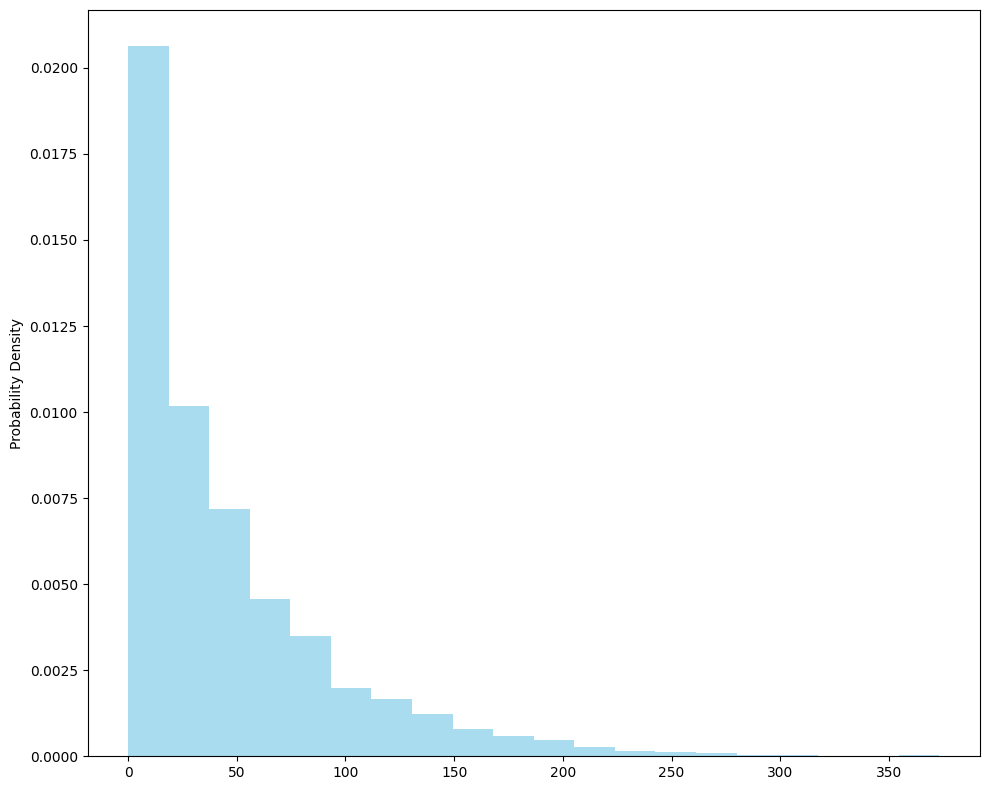

In [22]:
hist(difference, 'No')

In [23]:
model_data['cumulative_cost'] = model_data['cumulative_cost'].fillna(0)

#### Redress target value's imbalance.
##### This imbalance is quite high and model will be biased identifying Noes as it was seen well in Base-line-model prediction.  

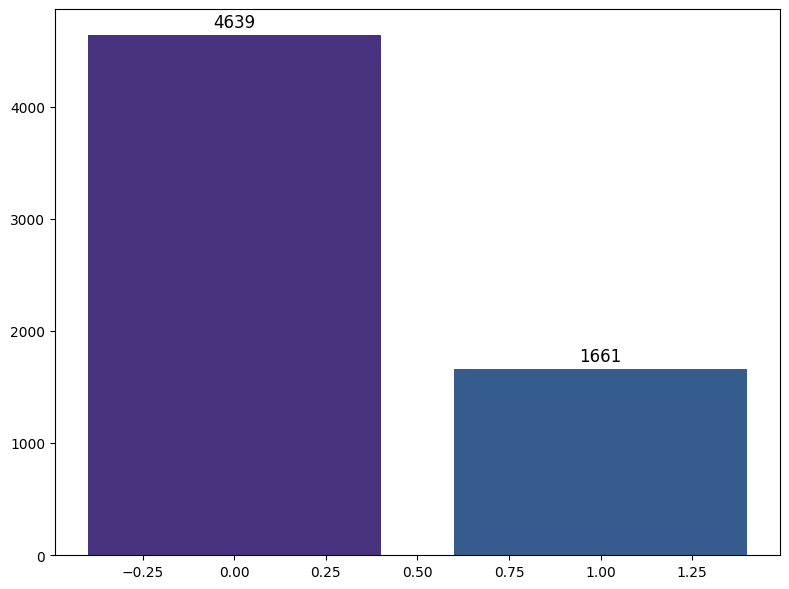

In [24]:
target_values = model_data.churn.value_counts()
bar(target_values)

In [25]:
churn_0 = model_data[model_data['churn'] == 0]
churn_1 = model_data[model_data['churn'] == 1]

In [26]:
print(f'Shape of churn_0: {churn_0.shape}')
print(f'Shape of churn_1: {churn_1.shape}')


Shape of churn_0: (4639, 20)
Shape of churn_1: (1661, 20)


### Spliting data into train and test
#### Test will be globaly and only train will be modified so that to reach maximum scores

In [27]:
X_train, X_test, y_train, y_test = split_data(model_data)
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()
y_train_knn = y_train.copy()
y_test_knn = y_test.copy()

## Categorical values' analysis according to the column "churn"

In [28]:
train_data_ = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
train_data_.columns = model_data.columns
def plot_churn_by_category(data, category_column):
    colors = ['#FBC6DA', 'lightgreen']
    grouped_data = data.groupby([category_column, 'churn']).size().unstack(fill_value=0)
    ax = grouped_data.plot(kind='bar', color=colors)
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.title('Churn Counts by {}'.format(category_column))
    plt.xticks(range(len(grouped_data)), grouped_data.index, rotation=45)
    plt.legend(title='Churn', labels=['Churn=0', 'Churn=1'])
    plt.show()

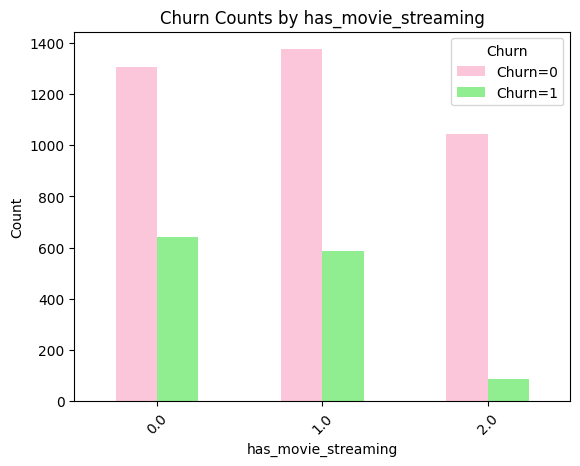

In [29]:
plot_churn_by_category(train_data_, train_data_.columns[0])

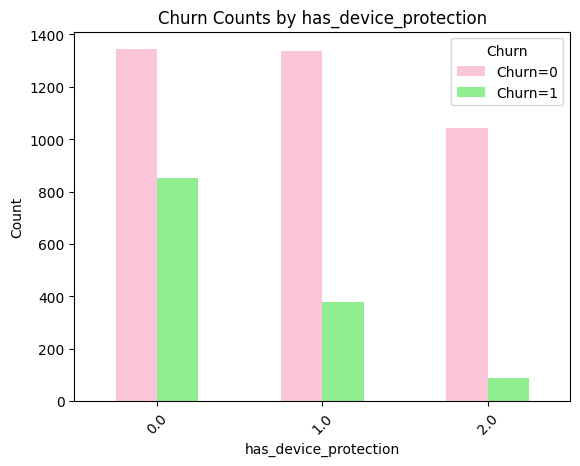

In [30]:
plot_churn_by_category(train_data_, train_data_.columns[1])

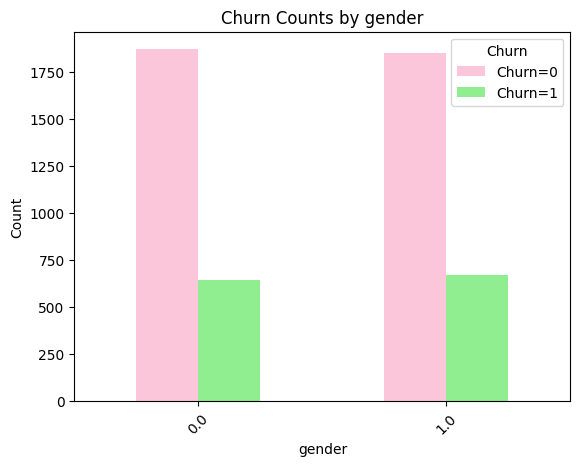

In [31]:
plot_churn_by_category(train_data_, train_data_.columns[3])

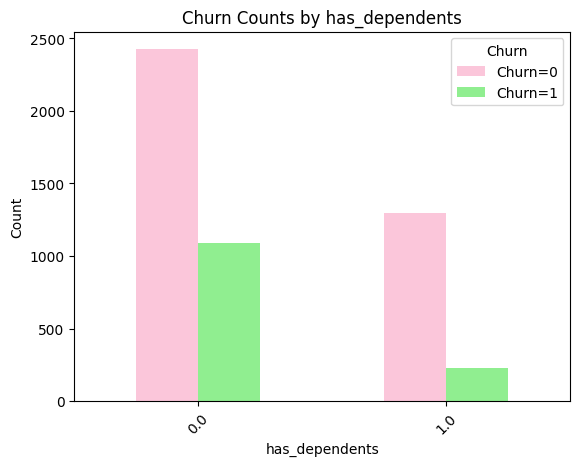

In [32]:
plot_churn_by_category(train_data_, train_data_.columns[4])

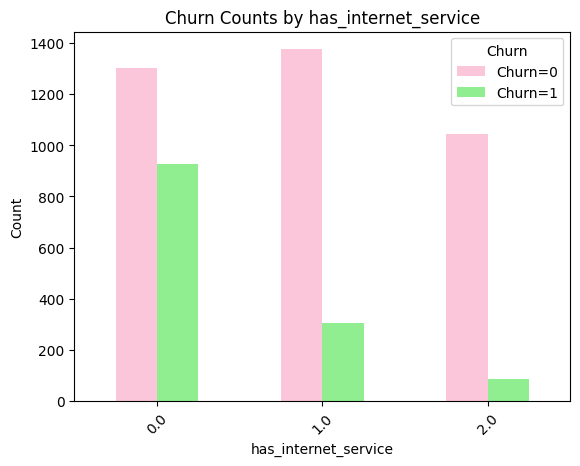

In [33]:
plot_churn_by_category(train_data_, train_data_.columns[5])

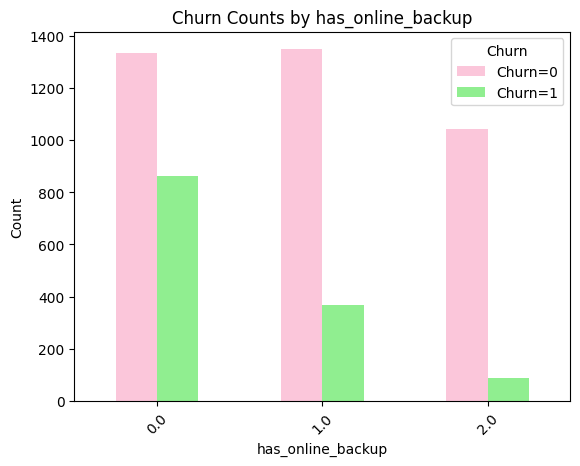

In [34]:
plot_churn_by_category(train_data_, train_data_.columns[6])

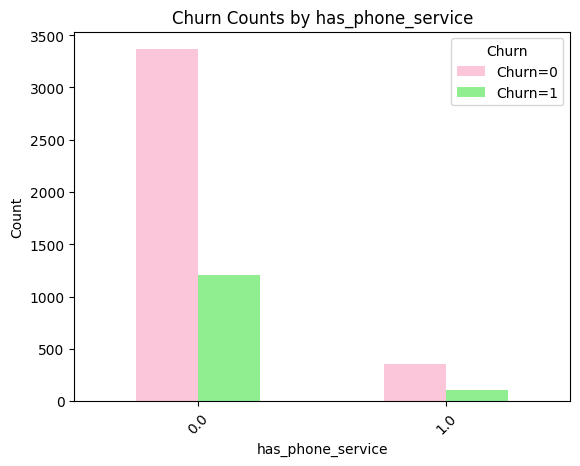

In [35]:
plot_churn_by_category(train_data_, train_data_.columns[7])

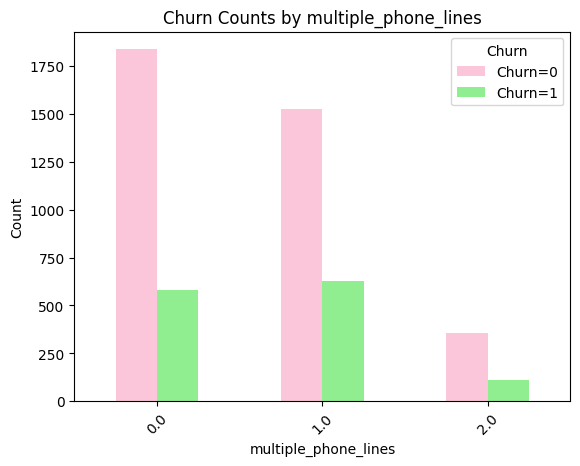

In [36]:
plot_churn_by_category(train_data_, train_data_.columns[8])

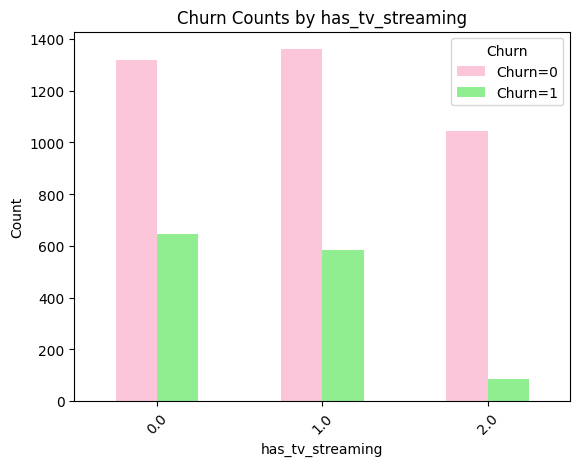

In [37]:
plot_churn_by_category(train_data_, train_data_.columns[9])

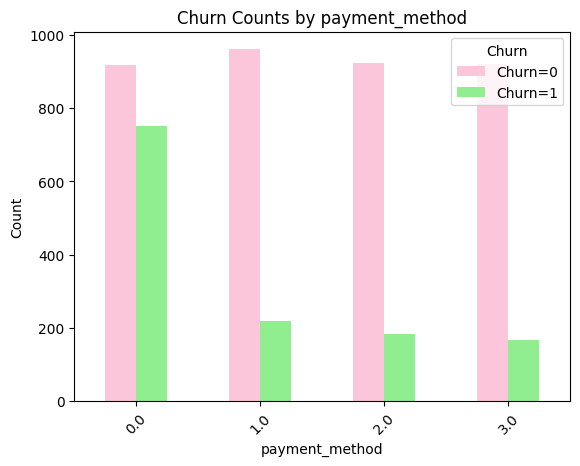

In [38]:
plot_churn_by_category(train_data_, train_data_.columns[10])

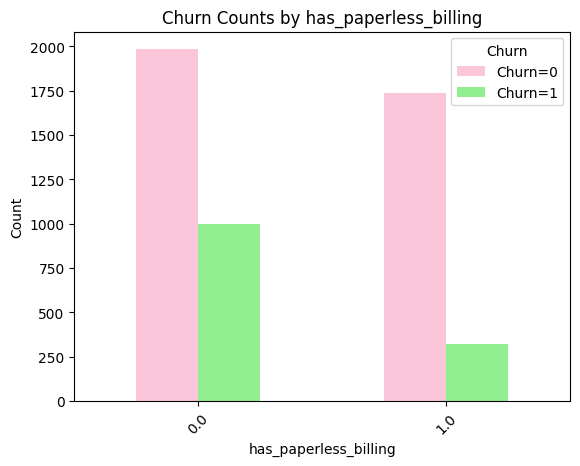

In [39]:
plot_churn_by_category(train_data_, train_data_.columns[11])

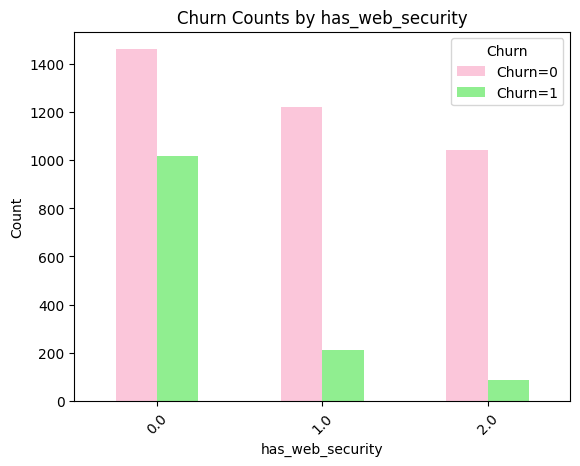

In [40]:
plot_churn_by_category(train_data_, train_data_.columns[12])

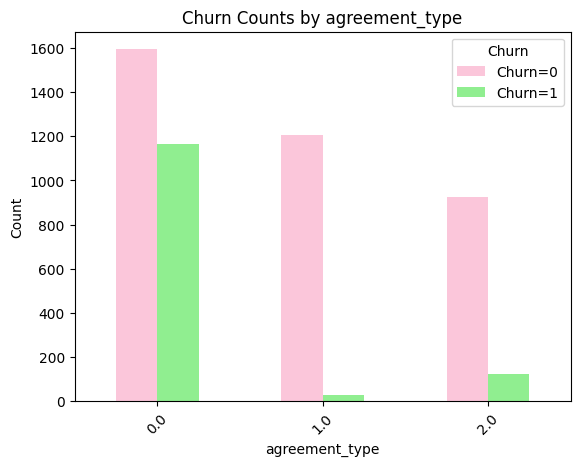

In [41]:
plot_churn_by_category(train_data_, train_data_.columns[13])

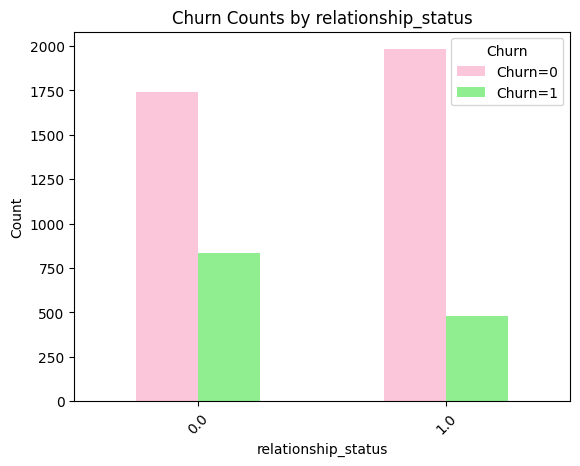

In [42]:
plot_churn_by_category(train_data_, train_data_.columns[14])

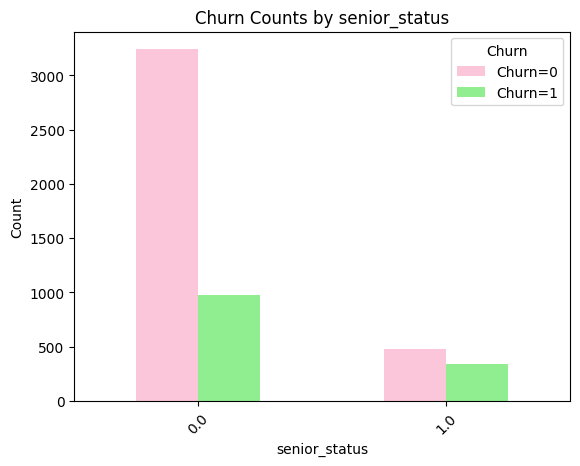

In [43]:
plot_churn_by_category(train_data_, train_data_.columns[15])

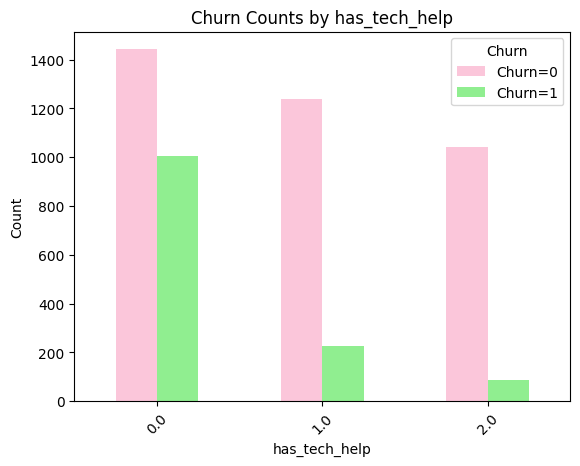

In [44]:
plot_churn_by_category(train_data_, train_data_.columns[17])

<Axes: >

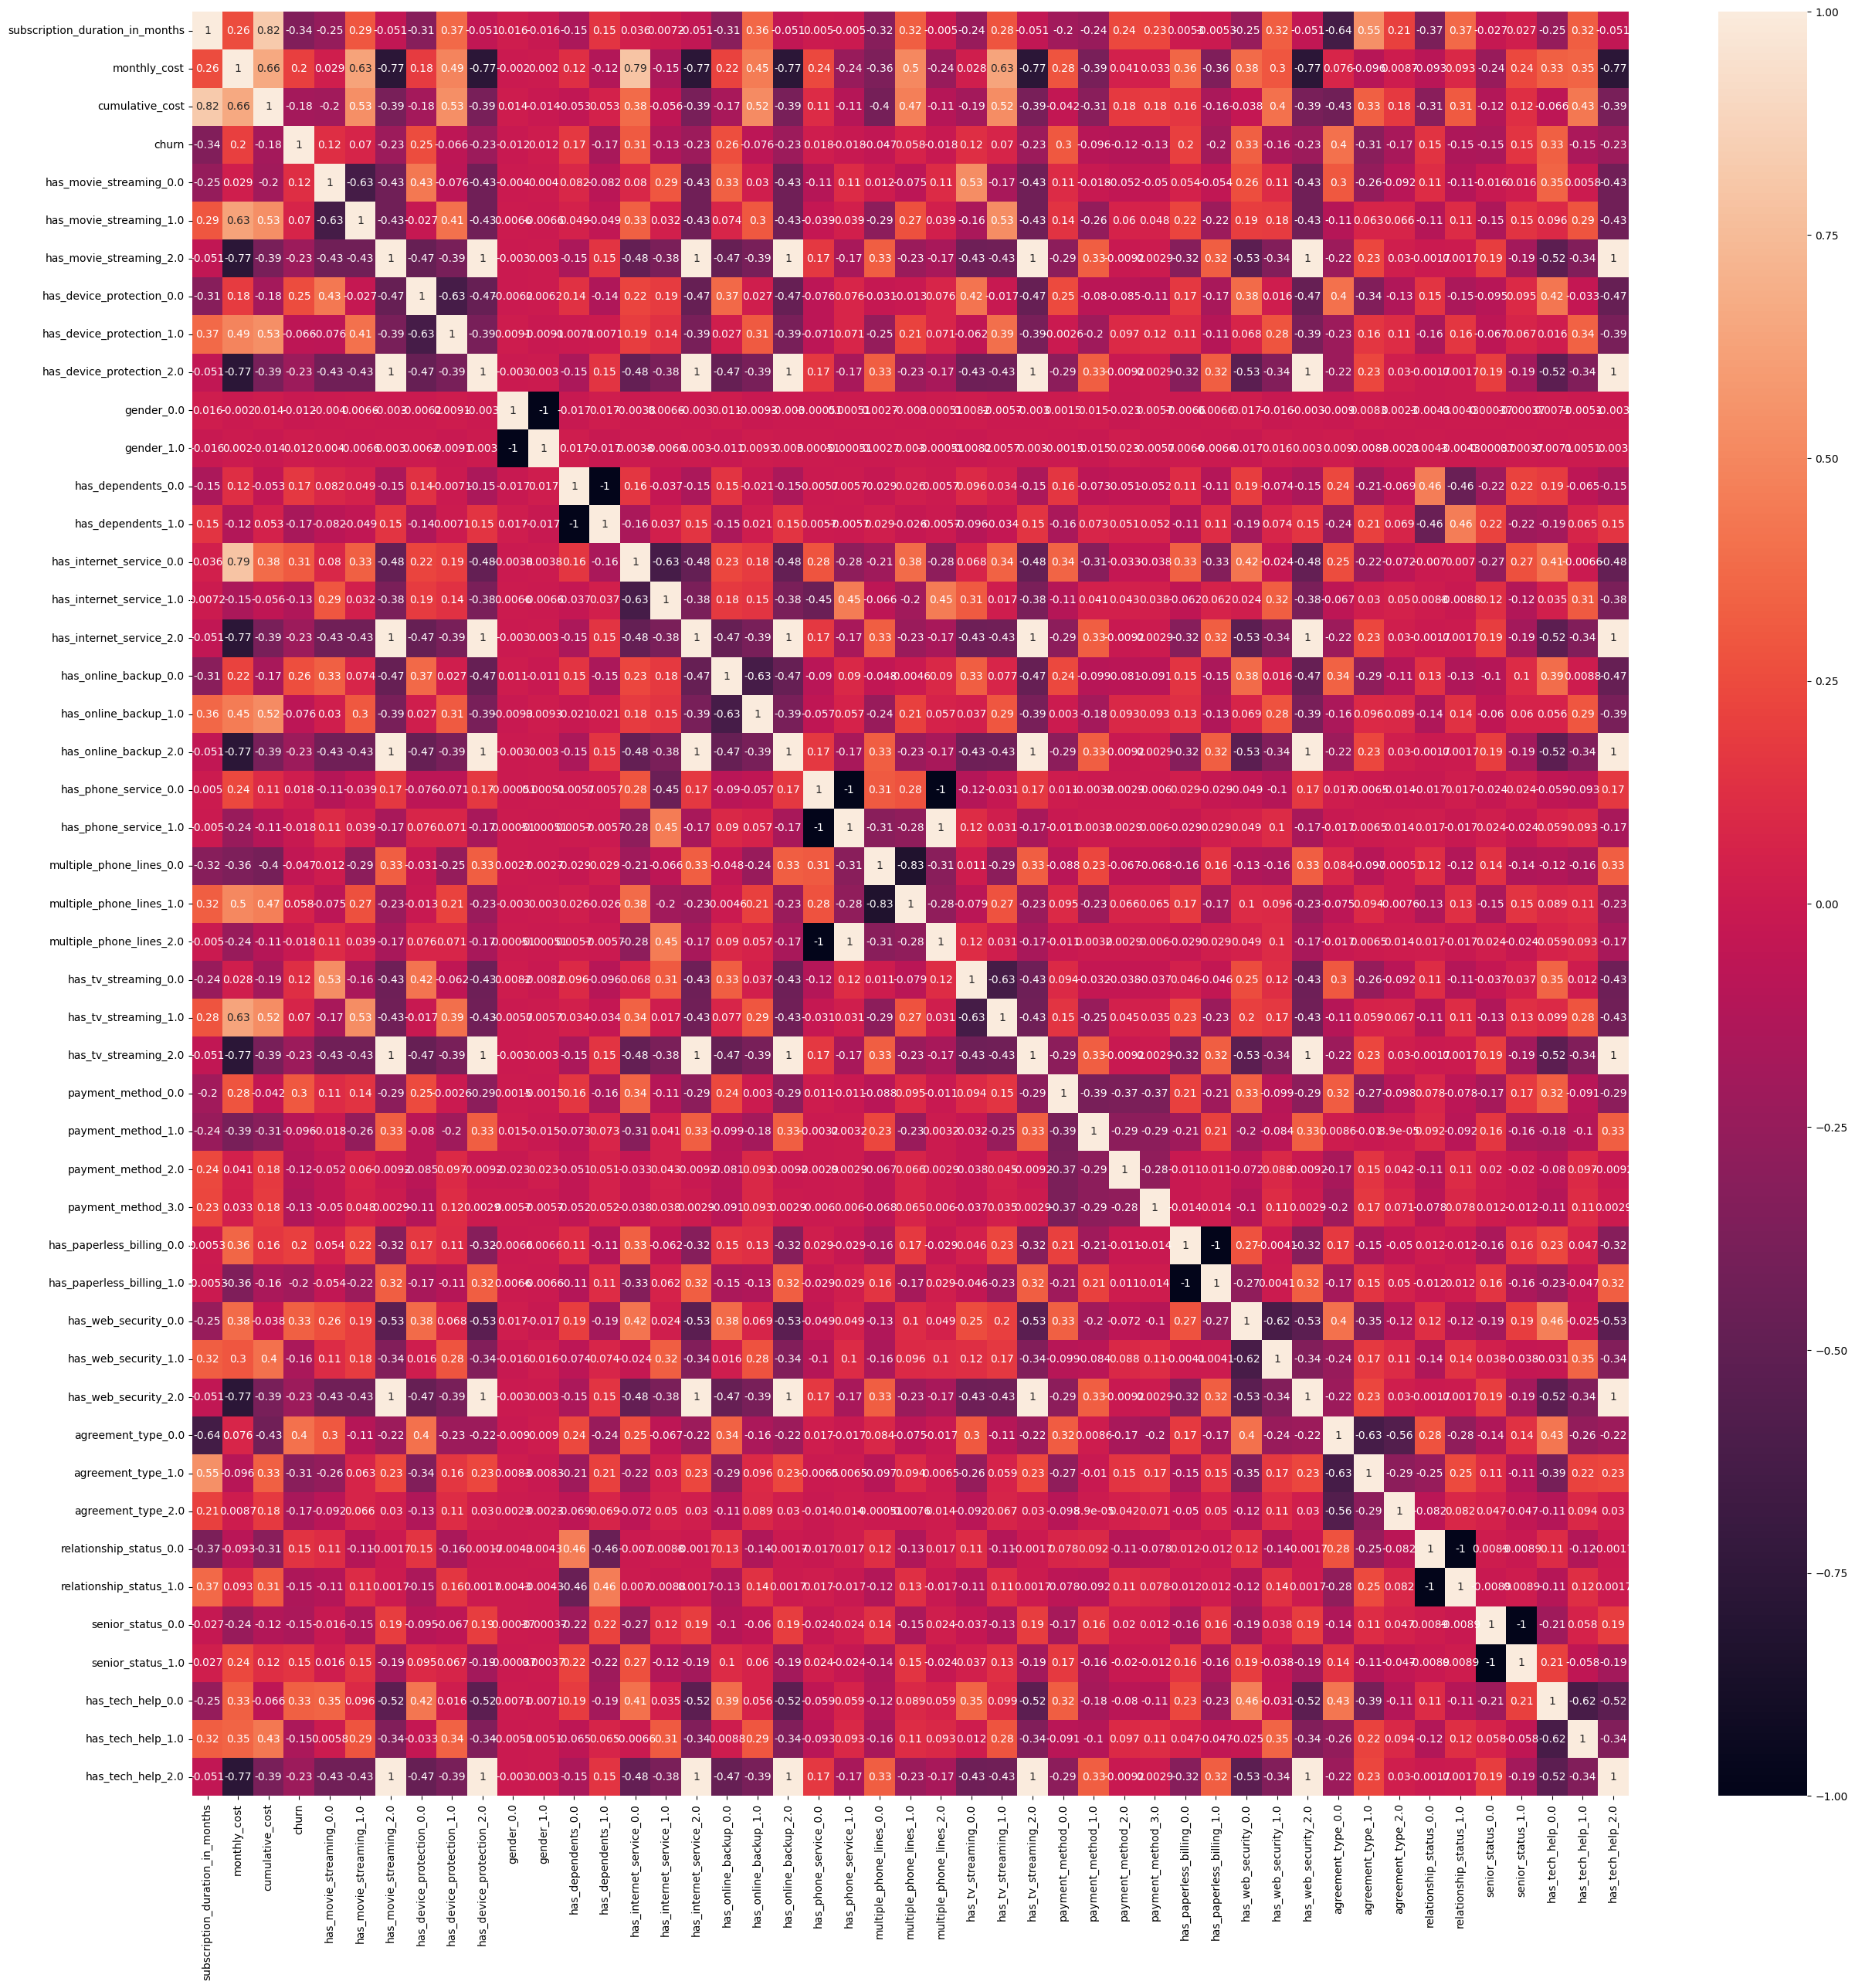

In [45]:
model_2_data = train_data_.copy()
for i in model_2_data.columns.drop(['subscription_duration_in_months', 'monthly_cost', 'cumulative_cost', 'churn']):
    variables = pd.get_dummies(model_2_data[i], prefix=i, dtype=int)
    model_2_data = pd.concat([model_2_data, variables], axis=1)
model_2_data.drop(['has_movie_streaming', 'has_device_protection', 'gender', 'has_dependents', 'has_internet_service',
                   'has_online_backup', 'has_web_security', 'has_tech_help', 'has_phone_service',
                   'multiple_phone_lines', 'has_tv_streaming', 'payment_method', 'has_paperless_billing',
                   'agreement_type', 'relationship_status', 'senior_status'], axis=1, inplace=True)
cor = model_2_data.corr()
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(cor, annot=True)

In [46]:
def scale_manually(X_train, X_test):
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)
    
    X_train.columns = data.columns[1:-1]
    X_test.columns = data.columns[1:-1]
    
    scaled_data_train = pd.DataFrame()
    for column in X_train.columns:
        min_val = np.min(X_train[column])
        max_val = np.max(X_train[column])
        scaled_data_train[column] = (X_train[column] - min_val) / (max_val - min_val)
        
    scaled_test_data = pd.DataFrame()
    for column in X_test.columns:
        min_val = np.min(X_train[column])
        max_val = np.max(X_train[column])
        scaled_test_data[column] = (X_test[column] - min_val) / (max_val - min_val)
    return scaled_data_train, scaled_test_data

In [48]:
X_train, X_test = scale_manually(X_train, X_test)
X_test[X_test['monthly_cost'] < 0] = 0
X_test[X_test['cumulative_cost'] < 0] = 0
X_test[X_test['subscription_duration_in_months'] < 0] = 0

In [50]:
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
train_data.columns = model_data.columns

## Categorical variables' analysis according to "churn" amount.


### Balancing data by Undersampling

In [51]:
def undersampling(data):
    churn_0 = data[data['churn'] == 0]
    churn_1 = data[data['churn'] == 1]
    churn_0_sample = churn_0.sample(churn_1.shape[0])
    ballanced_data_under = pd.DataFrame(pd.concat([churn_0_sample, churn_1], axis = 0))
    return ballanced_data_under

### Balancing data by Oversampling

In [52]:
def oversampling(data):
    churn_0 = data[data['churn'] == 0]
    churn_1 = data[data['churn'] == 1]
    a = churn_0.shape[0]
    b = churn_1.shape[0]
    churn_1 = churn_1.sample(n = a, replace = True)
    ballanced_data_over = pd.concat([churn_0, churn_1], axis = 0)
    return ballanced_data_over

### Balancing data by SMOTE

In [53]:
def SMOT(data):
    global model_data
    X = data.iloc[:,: -1]
    y = data.iloc[:, -1]
    
    smote = SMOTE(sampling_strategy='minority')
    X_sm, y_sm = smote.fit_resample(X, y)
    X_sm.columns = model_data.columns[0:-1]
    y_sm.columns = model_data.columns[-1]
    
    data_smot = pd.DataFrame(pd.concat([X_sm, y_sm], axis = 1))
    return data_smot

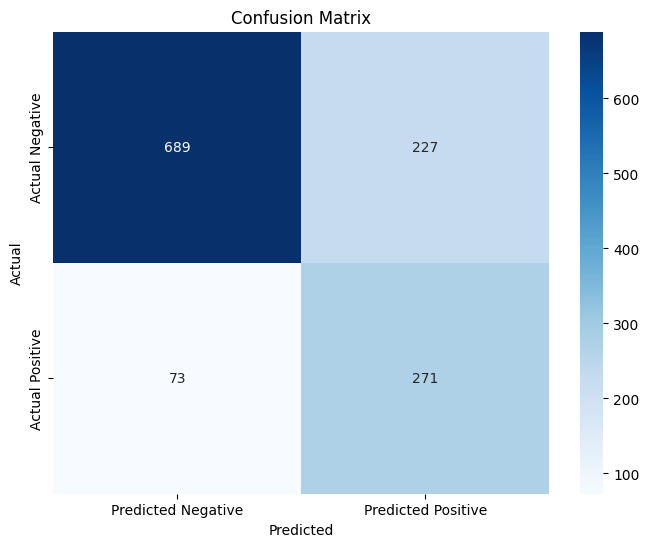

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       916
           1       0.54      0.79      0.64       344

    accuracy                           0.76      1260
   macro avg       0.72      0.77      0.73      1260
weighted avg       0.81      0.76      0.77      1260



array([0, 1, 1, ..., 1, 0, 0])

In [54]:
logistic_regression(undersampling(train_data).iloc[:, :-1].values, X_test.values, undersampling(train_data).iloc[:, -1].values, y_test.values)

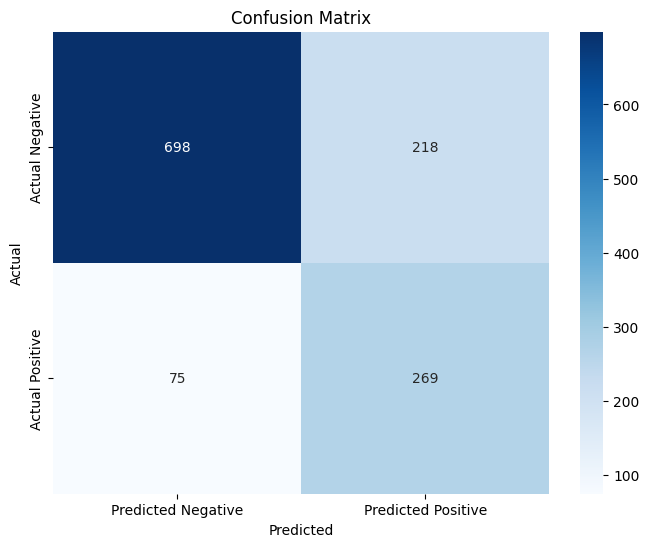

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       916
           1       0.55      0.78      0.65       344

    accuracy                           0.77      1260
   macro avg       0.73      0.77      0.74      1260
weighted avg       0.81      0.77      0.78      1260



array([0, 1, 1, ..., 1, 0, 0])

In [55]:
logistic_regression(oversampling(train_data).iloc[:, :-1].values, X_test.values, oversampling(train_data).iloc[:, -1].values, y_test.values)

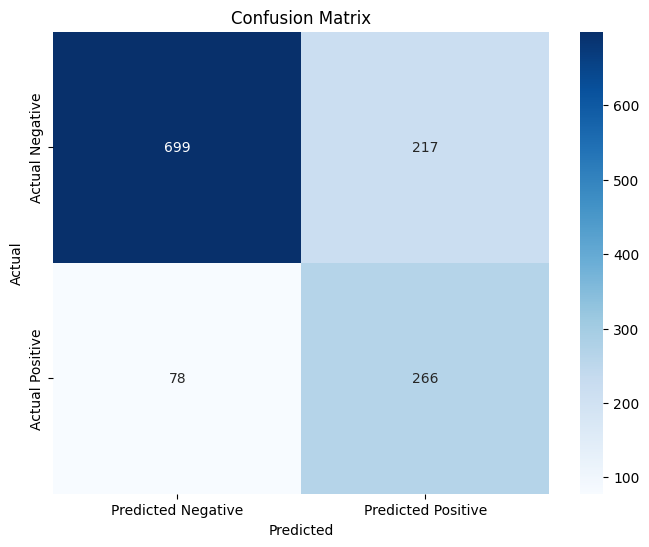

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       916
           1       0.55      0.77      0.64       344

    accuracy                           0.77      1260
   macro avg       0.73      0.77      0.73      1260
weighted avg       0.80      0.77      0.78      1260



array([0, 1, 1, ..., 1, 0, 0])

In [56]:
logistic_regression(SMOT(train_data).iloc[:, :-1].values, X_test.values, SMOT(train_data).iloc[:, -1].values, y_test.values)

In [57]:
data_under = undersampling(train_data)
data_under_knn = data_under.copy()
data_over = oversampling(train_data)
data_over_knn = data_over.copy()
data_SMOT = SMOT(train_data)
data_SMOT_knn = data_SMOT.copy()

Outlier Border: 0.0
Outlier Border: 1.0
Outlier Border: 0.0
Outlier Border: 1.0
Outlier Border: 0.0
Outlier Border: 0.9437638172439204


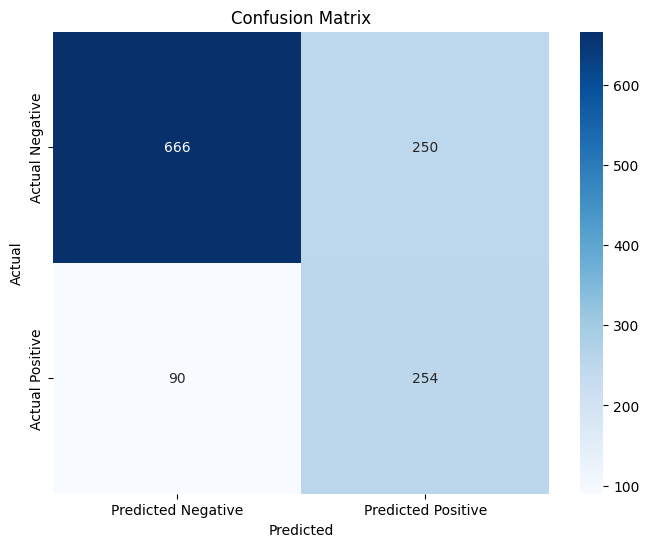

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       916
           1       0.50      0.74      0.60       344

    accuracy                           0.73      1260
   macro avg       0.69      0.73      0.70      1260
weighted avg       0.78      0.73      0.74      1260



array([0, 0, 0, ..., 1, 0, 0])

In [58]:
X_train_over = data_over.iloc[:, :-1]
y_train_over = data_over.iloc[:, -1]
handle_test(X_train_over.values, X_test, y_train_over.values, y_test.values)

## Distribution analysis

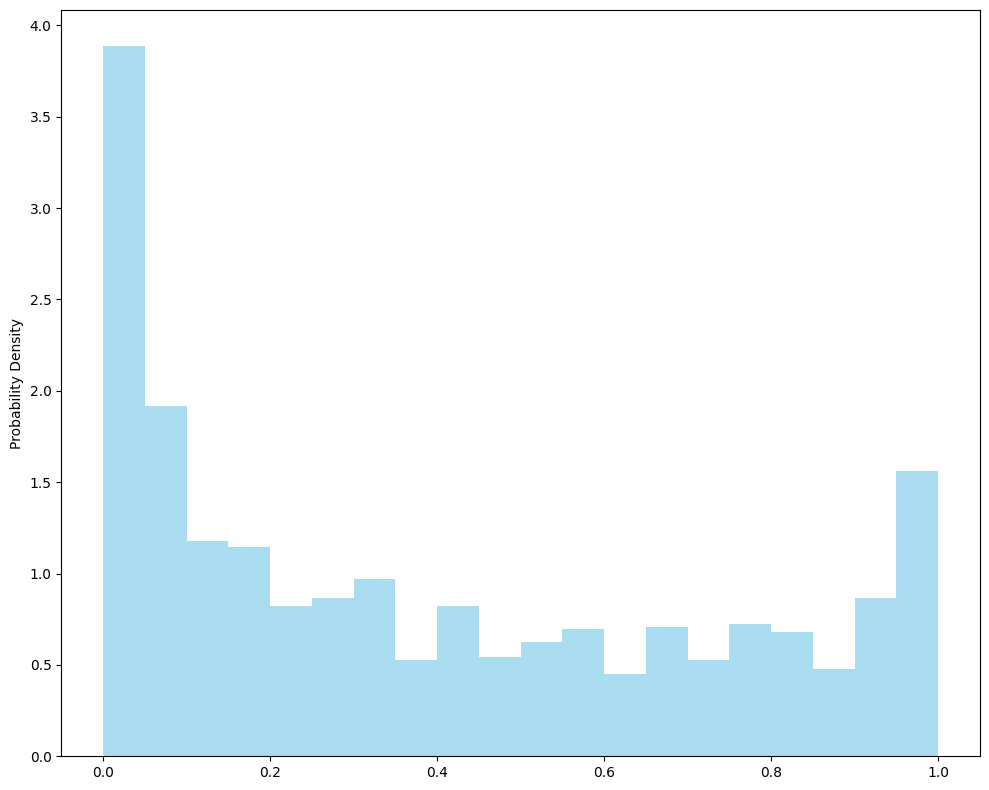

In [59]:
hist(X_train_over['subscription_duration_in_months'], 'No')  

<Figure size 1200x800 with 0 Axes>

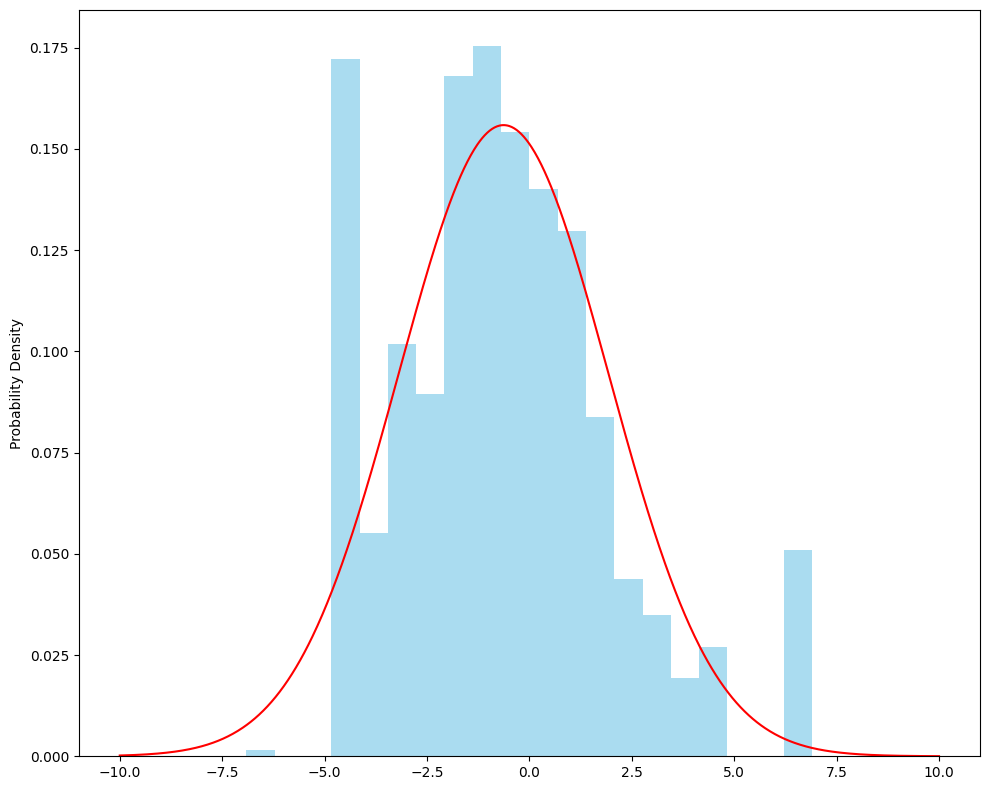

In [60]:
epsilon = 1e-3
X_train_over['subscription_duration_in_months'] = np.log((X_train_over['subscription_duration_in_months'] + epsilon) / (1 - X_train_over['subscription_duration_in_months'] + epsilon))

plt.figure(figsize=(12, 8))  
hist(X_train_over['subscription_duration_in_months'], 'Yes')  

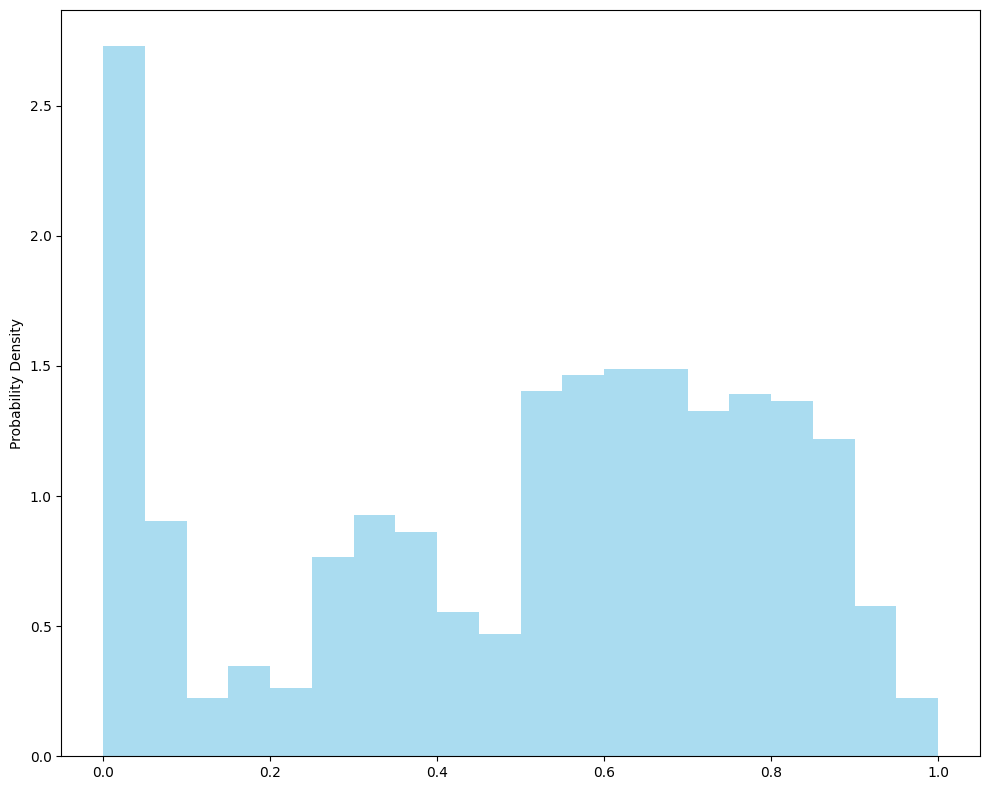

In [61]:
hist(X_train_over['monthly_cost'], 'No')  

<Figure size 1200x800 with 0 Axes>

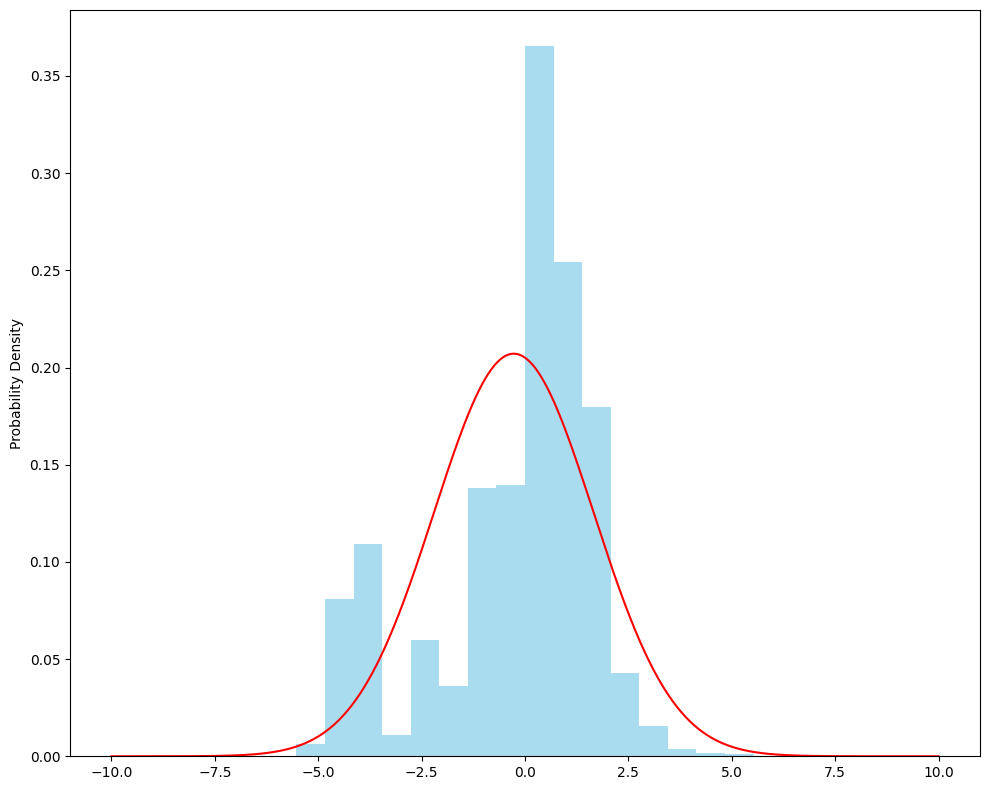

In [62]:
epsilon = 1e-3
X_train_over['monthly_cost'] = np.log((X_train_over['monthly_cost'] + epsilon) / (1 - X_train_over['monthly_cost'] + epsilon))

plt.figure(figsize=(12, 8))  
hist(X_train_over['monthly_cost'], 'Yes') 

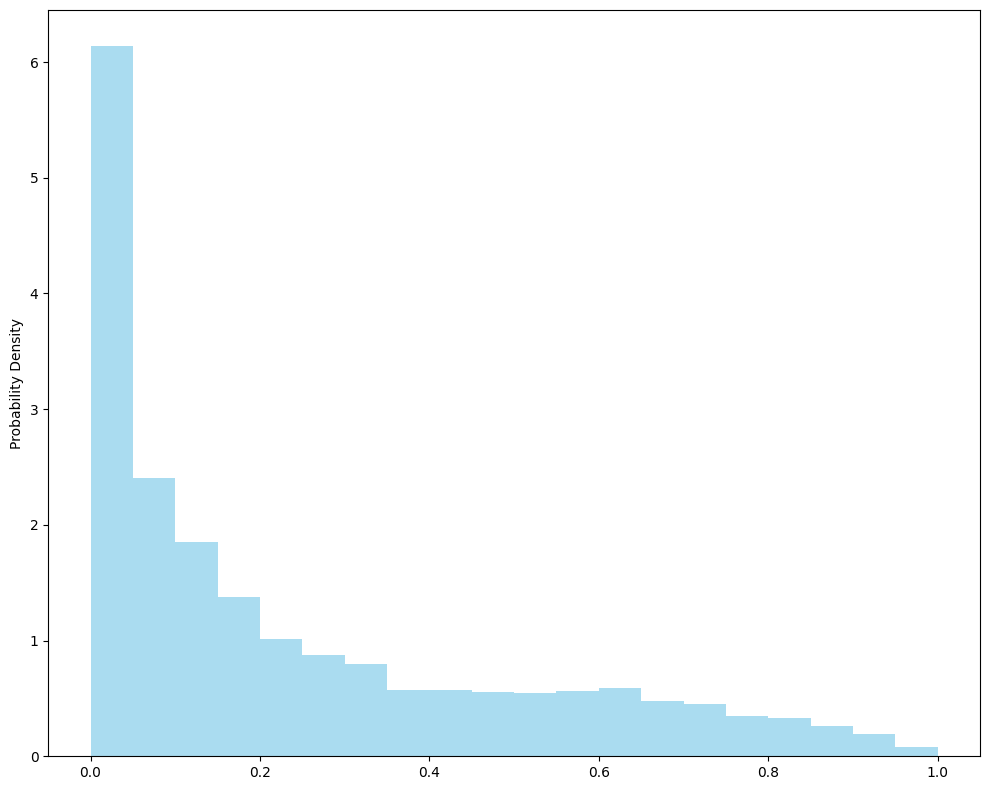

In [63]:
hist(X_train_over['cumulative_cost'], 'No')  

<Figure size 1200x800 with 0 Axes>

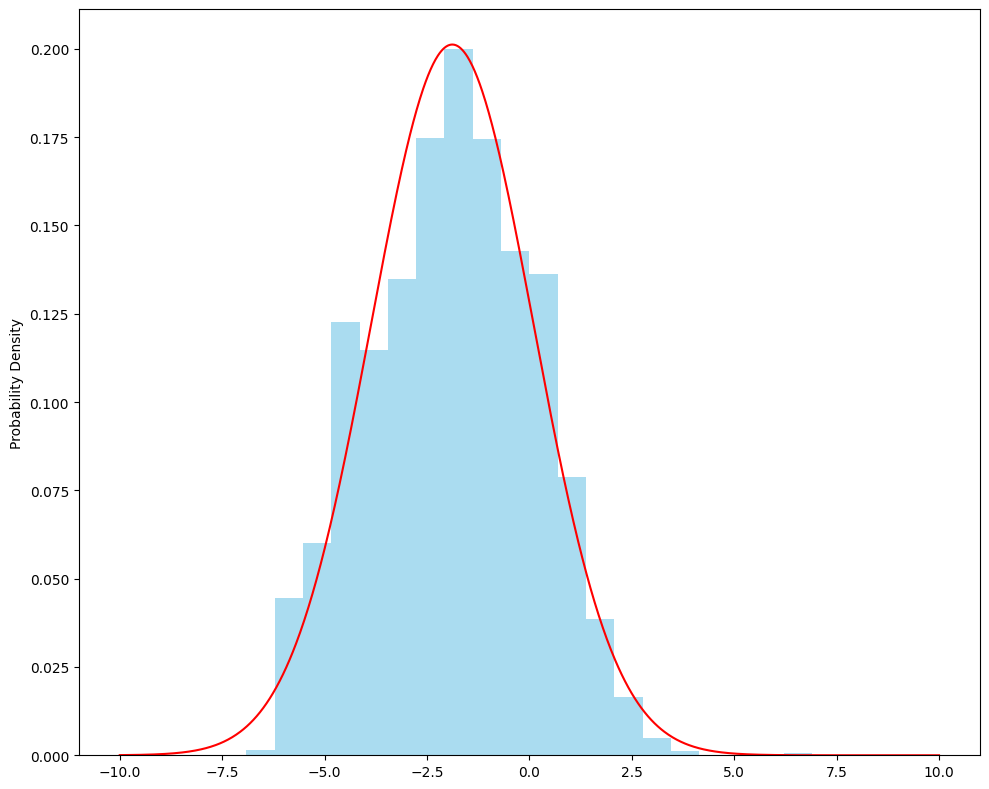

In [64]:
epsilon = 1e-3
X_train_over['cumulative_cost'] = np.log((X_train_over['cumulative_cost'] + epsilon) / (1 - X_train_over['cumulative_cost'] + epsilon))

plt.figure(figsize=(12, 8))  
hist(X_train_over['cumulative_cost'], 'Yes') 

Outlier Border: -3.9495437006248992
Outlier Border: 3.8720495911865926
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.7663440019176635


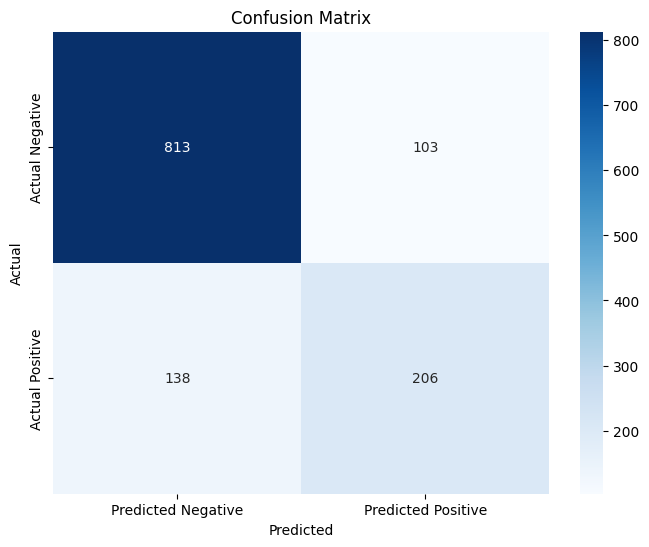

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       916
           1       0.67      0.60      0.63       344

    accuracy                           0.81      1260
   macro avg       0.76      0.74      0.75      1260
weighted avg       0.80      0.81      0.81      1260



array([0, 0, 0, ..., 0, 0, 0])

In [65]:
handle_test(X_train_over, X_test, y_train_over, y_test)

## Outliers analisis

Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341


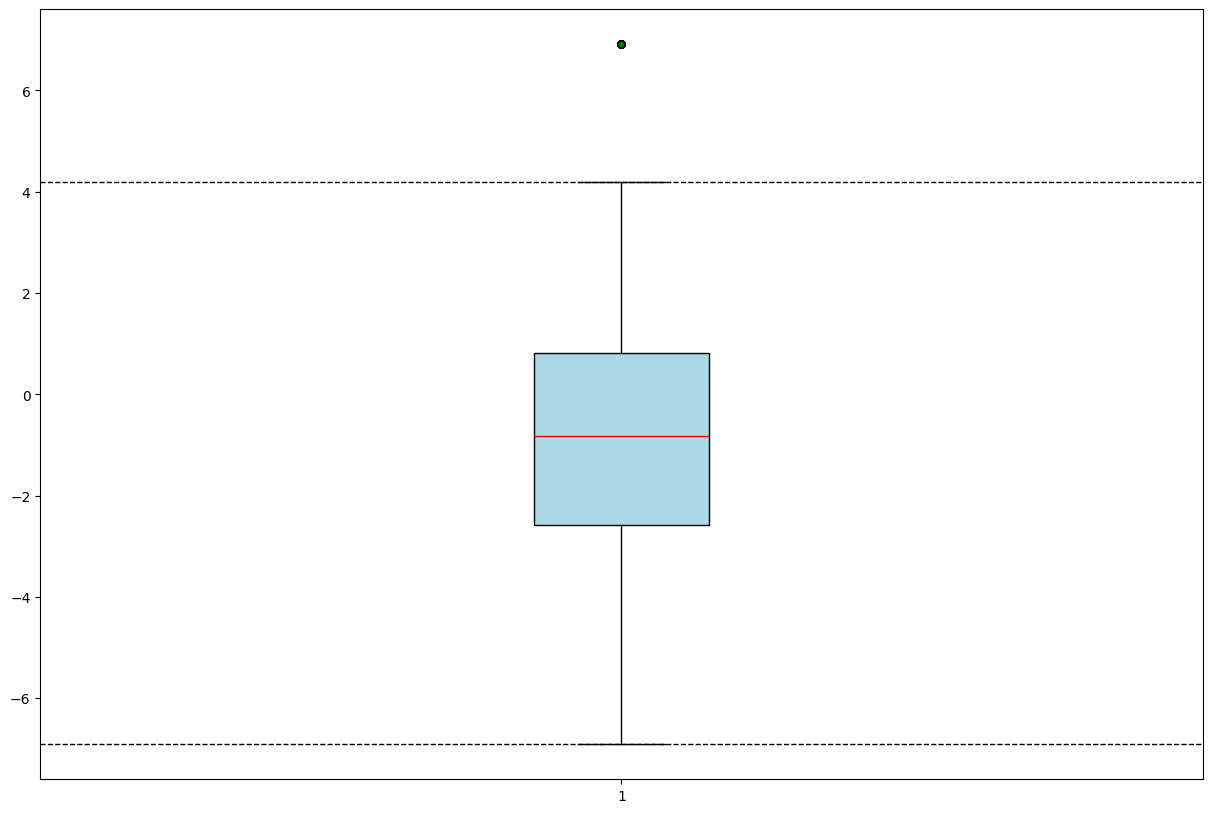

In [66]:
border_1 = boxplot(X_train_over, 'subscription_duration_in_months', 'Yes')

In [67]:
X_train_over.loc[X_train_over['subscription_duration_in_months'] > border_1[1], 'subscription_duration_in_months'] = border_1[1]
X_train_over.loc[
    X_train_over['subscription_duration_in_months'] < border_1[0], 'subscription_duration_in_months'] = border_1[0]

Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341


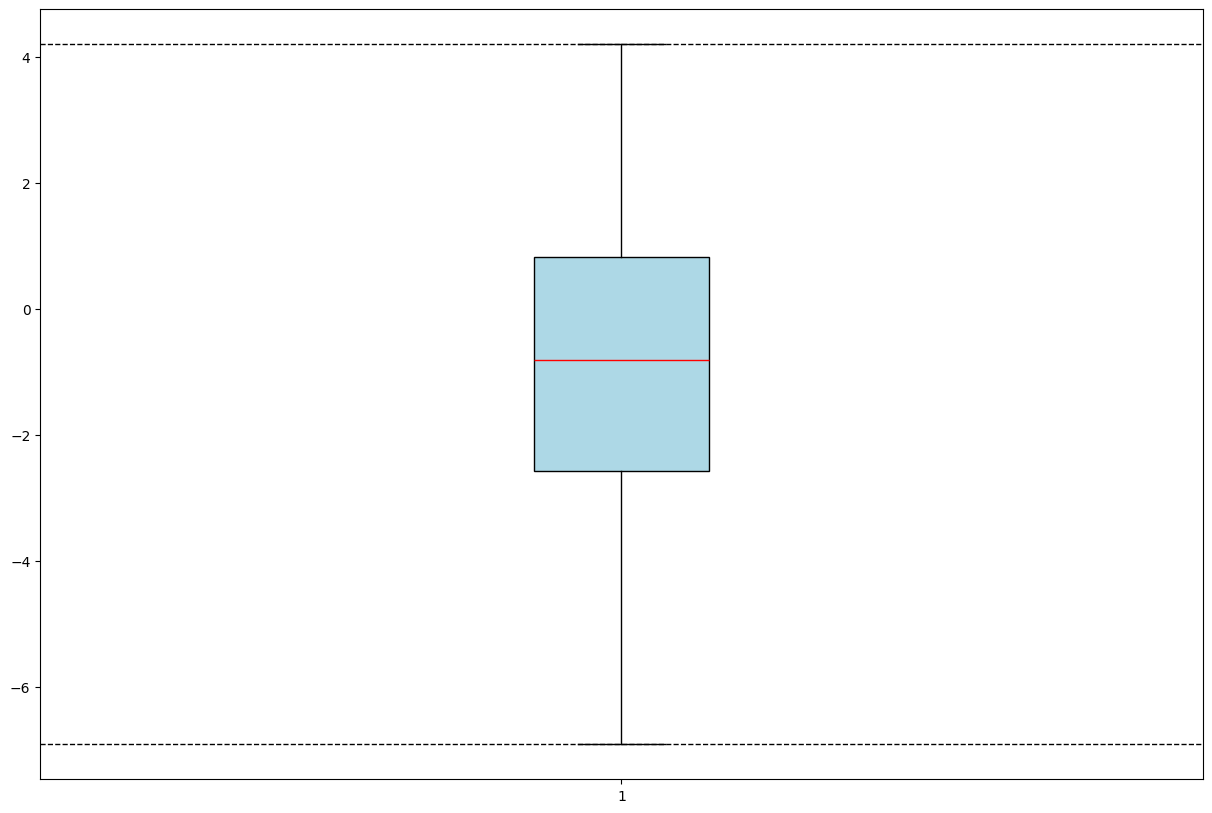

[-6.90875477931522, 4.19416738506341]

In [68]:
boxplot(X_train_over, 'subscription_duration_in_months', 'Yes')

Outlier Border: -3.9495437006248992
Outlier Border: 3.8720495911865926


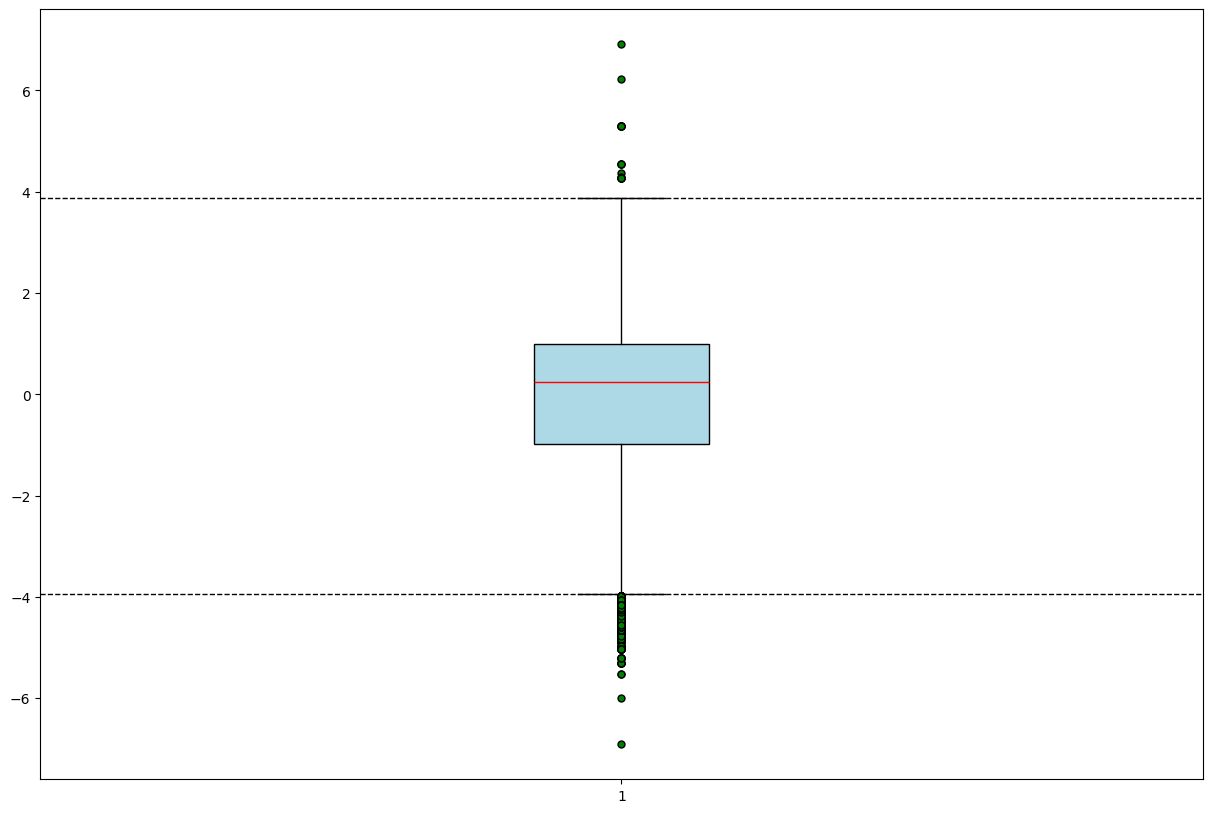

In [69]:
border_2 = boxplot(X_train_over, 'monthly_cost', 'Yes')

Outlier Border: -3.9495437006248992
Outlier Border: 3.8720495911865926


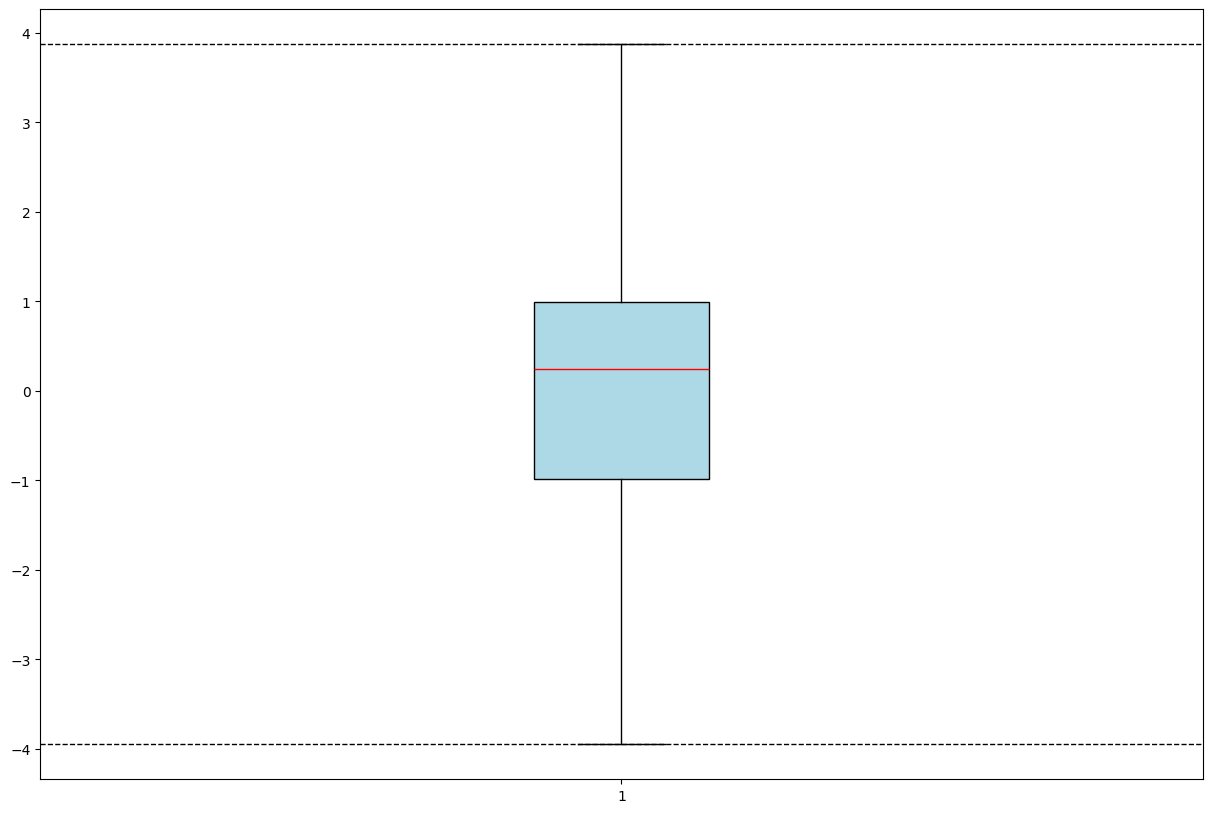

[-3.9495437006248992, 3.8720495911865926]

In [70]:
X_train_over.loc[X_train_over['monthly_cost'] > border_2[1], 'monthly_cost'] = border_2[1]
X_train_over.loc[
    X_train_over['monthly_cost'] < border_2[0], 'monthly_cost'] = border_2[0]
boxplot(X_train_over, 'monthly_cost', 'Yes')

Outlier Border: -6.90875477931522
Outlier Border: 3.7663440019176635


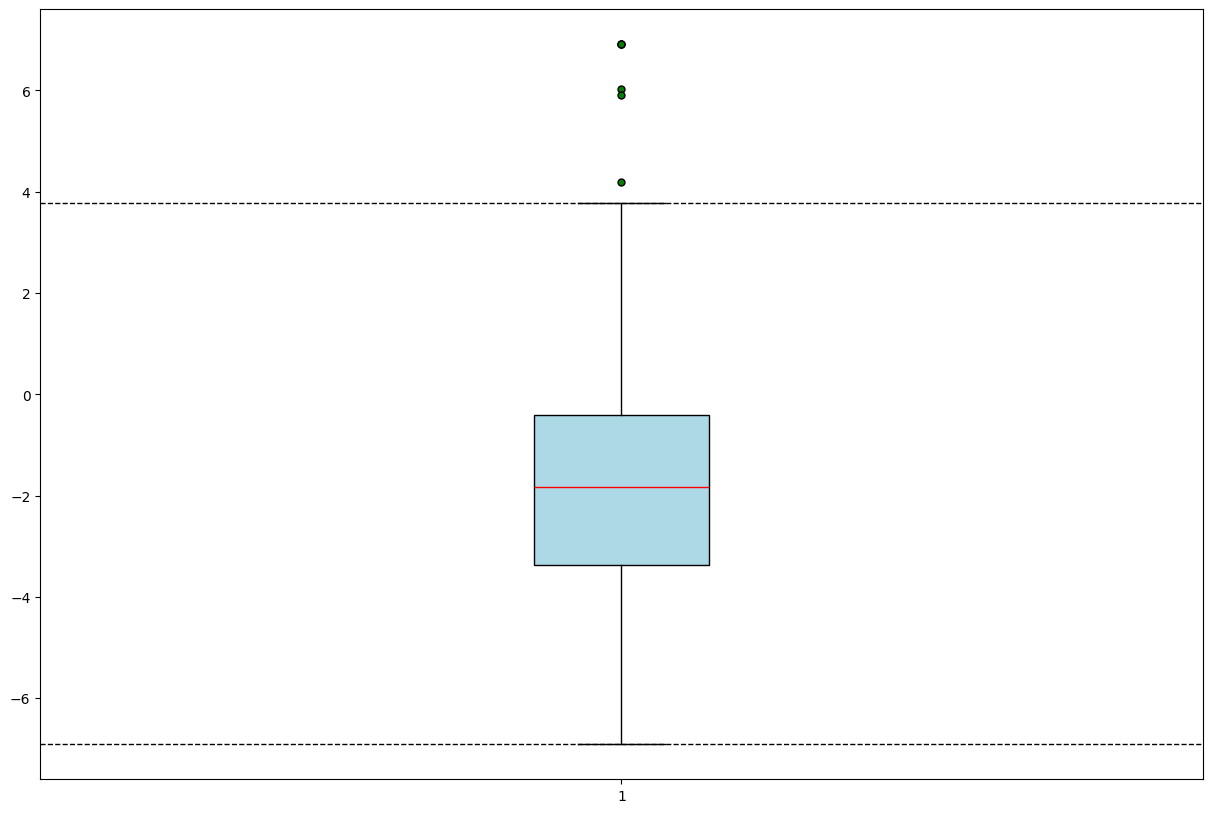

In [71]:
border_3 = boxplot(X_train_over, 'cumulative_cost', 'Yes')

Outlier Border: -6.90875477931522
Outlier Border: 3.7663440019176635


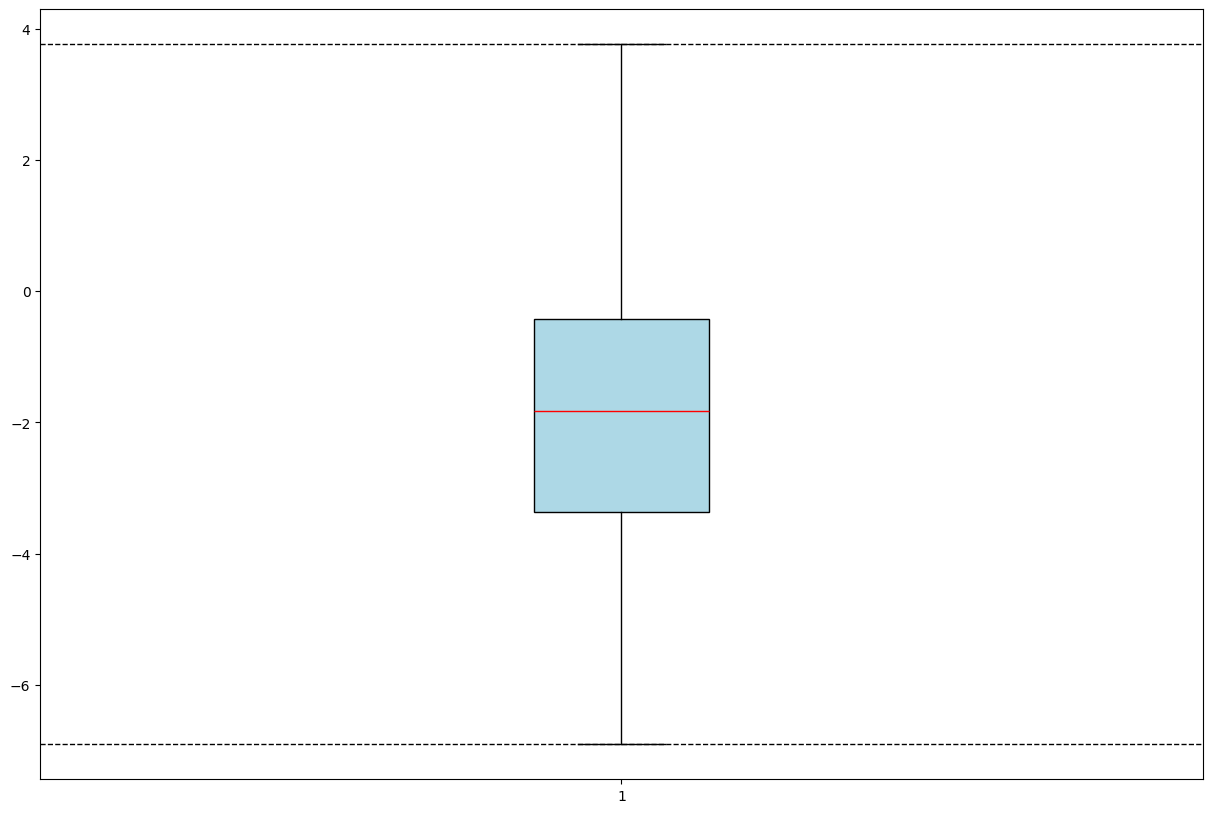

[-6.90875477931522, 3.7663440019176635]

In [72]:
X_train_over.loc[X_train_over['cumulative_cost'] > border_3[1], 'cumulative_cost'] = border_3[1]
X_train_over.loc[
    X_train_over['cumulative_cost'] < border_3[0], 'cumulative_cost'] = border_3[0]
boxplot(X_train_over, 'cumulative_cost', 'Yes')

Outlier Border: -3.9495437006248992
Outlier Border: 3.8720495911865926
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.7663440019176635


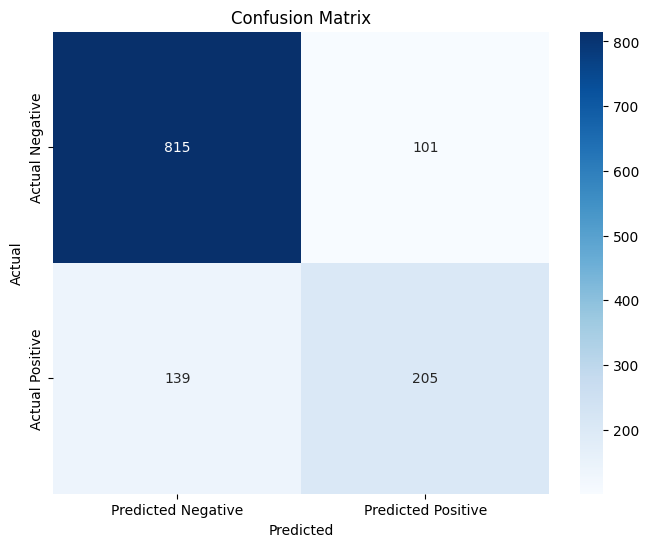

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       916
           1       0.67      0.60      0.63       344

    accuracy                           0.81      1260
   macro avg       0.76      0.74      0.75      1260
weighted avg       0.80      0.81      0.81      1260



array([0, 0, 0, ..., 0, 0, 0])

In [73]:
handle_test(X_train_over.values, X_test, y_train_over.values, y_test)

## Feature engineering

In [74]:
corr_data = pd.concat([X_train_over, y_train_over], axis=1)

<Axes: >

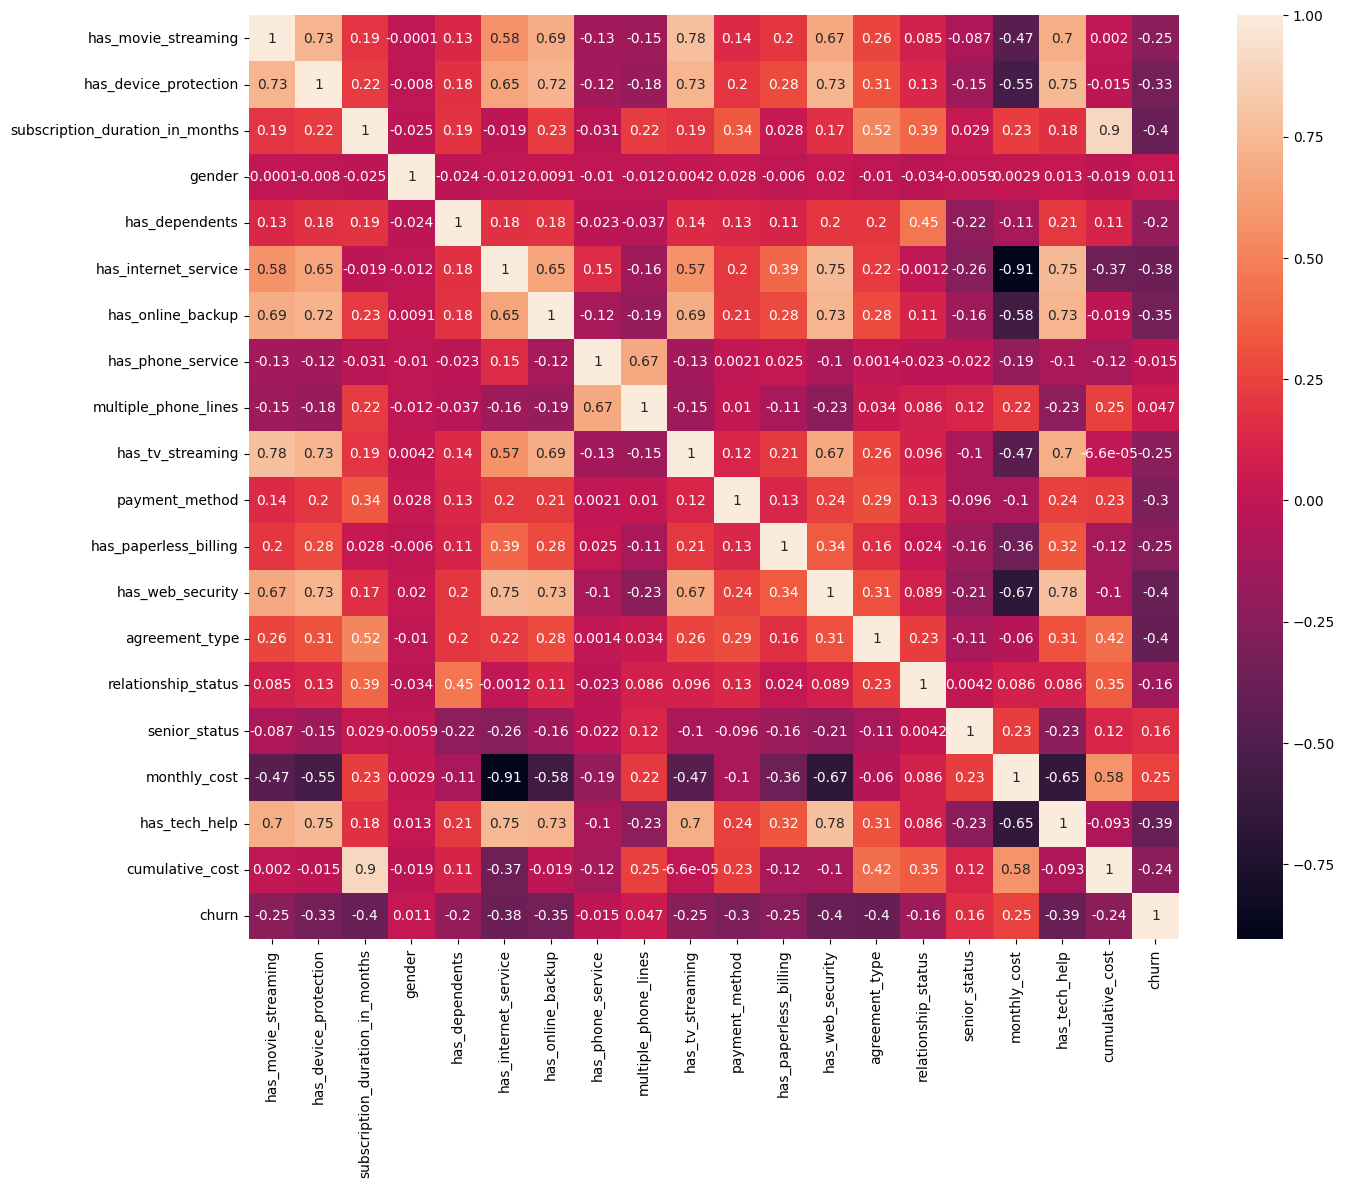

In [75]:
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True)

Outlier Border: -3.9495437006248992
Outlier Border: 3.8720495911865926
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.7663440019176635


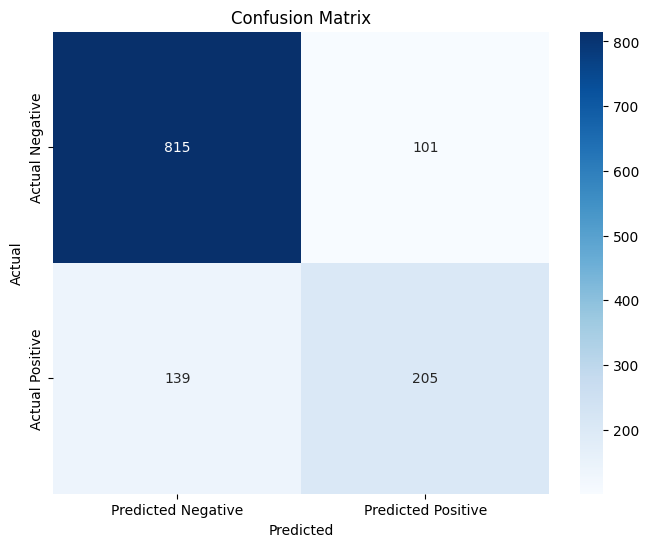

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       916
           1       0.67      0.60      0.63       344

    accuracy                           0.81      1260
   macro avg       0.76      0.74      0.75      1260
weighted avg       0.80      0.81      0.81      1260



array([0, 0, 0, ..., 0, 0, 0])

In [76]:
handle_test(X_train_over.values, X_test, y_train_over.values, y_test)

In [77]:
X_train_over['internet_with_backup'] = X_train_over['has_internet_service'] * X_train_over['has_online_backup']
X_train_over['internet_and_tv_streaming'] = X_train_over['has_tv_streaming'] * X_train_over['has_internet_service']
X_train_over['total_services'] = X_train_over[['has_movie_streaming', 'has_device_protection', 'has_online_backup', 'has_web_security', 'has_tech_help']].sum(axis=1)
X_train_over['avg_monthly_cost_per_service'] = np.where(X_train_over['total_services'] != 0, 
                                                  X_train_over['monthly_cost'] / X_train_over['total_services'], 
                                                  0)
X_train_over['avg_monthly_cost_per_service'] = X_train_over['avg_monthly_cost_per_service'].replace([np.inf, -np.inf], 0)



<Axes: >

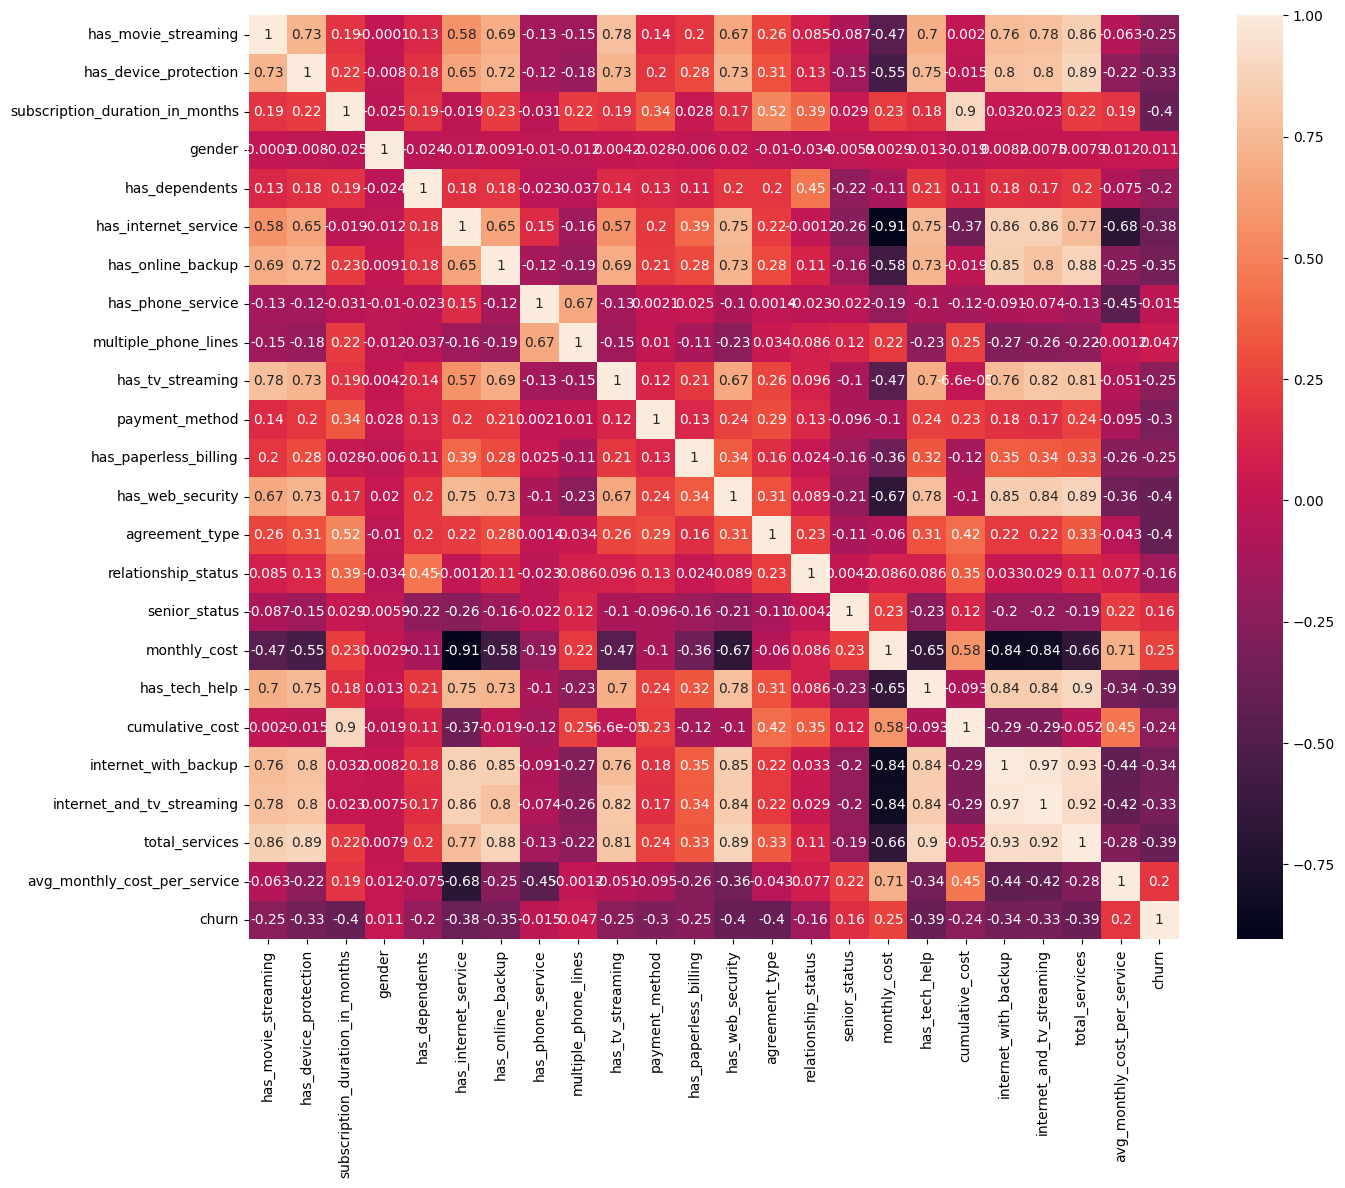

In [78]:
corr_data_ = pd.concat([X_train_over, y_train_over], axis=1)
corr_ = corr_data_.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_, annot=True)

Outlier Border: -3.9495437006248992
Outlier Border: 3.8720495911865926
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.7663440019176635


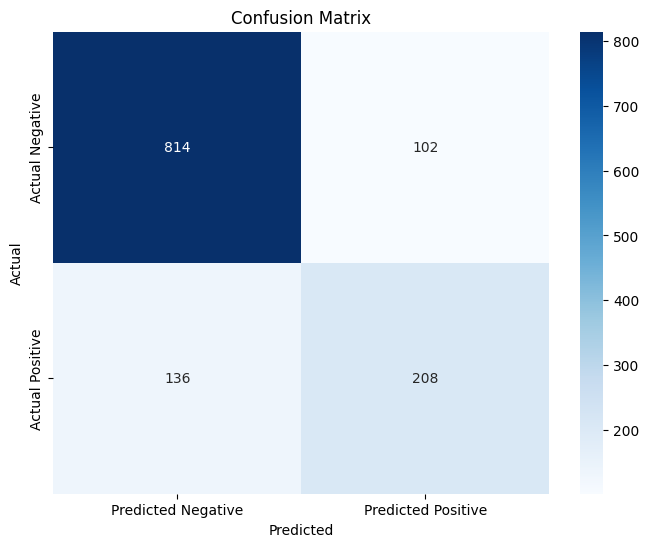

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       916
           1       0.67      0.60      0.64       344

    accuracy                           0.81      1260
   macro avg       0.76      0.75      0.75      1260
weighted avg       0.81      0.81      0.81      1260



array([0, 0, 0, ..., 0, 0, 0])

In [79]:
handle_test(X_train_over.values, X_test, y_train_over.values, y_test, feature_engineer = 'Yes')

## KNN - K Nearest Neighbore

In [101]:
def knn(X_train_knn, X_test_knn, y_train_knn, y_test_knn, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the KNN model
    knn.fit(X_train_knn, y_train_knn)
    # Make prediction
    knn_pred = knn.predict(X_test_knn)
    # Generate the classification report
    report = metrics.classification_report(y_test_knn, knn_pred)
    print(report)

# Extract features and labels
X_train_over_knn = data_over_knn.iloc[:, :-1]
y_train_over_knn = data_over_knn.iloc[:, -1]

X_test_knn.columns = X_train_over_knn.columns
y_test_knn.columns = ['churn']

X_train_knn = oversampling(train_data_)

# Scale both training and test data
X_train_knn_scaled, X_test_knn_scaled = scale_manually(X_train_knn.iloc[:,:-1], X_test_knn)

# Call the knn function with scaled test data
knn(X_train_knn_scaled, X_test_knn_scaled, y_train_over_knn, y_test_knn, 5)


              precision    recall  f1-score   support

           0       0.85      0.71      0.77       916
           1       0.47      0.68      0.55       344

    accuracy                           0.70      1260
   macro avg       0.66      0.69      0.66      1260
weighted avg       0.75      0.70      0.71      1260



In [100]:
X_train_knn_scaled

,has_movie_streaming,has_device_protection,subscription_duration_in_months,gender,has_dependents,has_internet_service,has_online_backup,has_phone_service,multiple_phone_lines,has_tv_streaming,payment_method,has_paperless_billing,has_web_security,agreement_type,relationship_status,senior_status,monthly_cost,has_tech_help,cumulative_cost
0,0.0,0.5,0.944444,1.0,0.0,0.5,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,1.0,0.0,0.0,0.359243,0.0,0.423147
1,0.5,0.0,0.444444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.608869,0.0,0.306858
2,0.0,0.0,0.652778,1.0,0.0,0.5,0.5,0.0,0.0,0.5,0.666667,0.0,0.0,0.0,1.0,0.0,0.400598,0.0,0.313582
3,0.0,0.0,0.208333,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.573991,0.0,0.130210
4,0.0,0.0,0.013889,1.0,0.0,0.5,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.254609,0.0,0.005061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,1.0,1.0,0.611111,0.0,1.0,1.0,1.0,0.0,0.5,1.0,0.333333,1.0,1.0,1.0,1.0,0.0,0.072745,1.0,0.127867
5036,0.5,0.0,0.708333,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.647733,0.0,0.477783
5037,0.5,0.5,1.000000,1.0,1.0,0.5,0.5,0.0,0.5,0.5,0.666667,0.0,0.5,0.5,1.0,0.0,0.745889,0.5,0.770190
5038,0.0,0.5,0.430556,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.367215,0.5,0.197546


## Decision Tree